# Pandas Tutorial

In [1]:
import pandas as pd
import sys

print('Pandas Version', pd.__version__)
print("Python executable:", sys.executable)
print("Python version:", sys.version)
print("sys.path:", sys.path)


Pandas Version 2.3.1
Python executable: /opt/anaconda3/envs/ml_notes_venv/bin/python
Python version: 3.11.13 (main, Jun  5 2025, 08:21:08) [Clang 14.0.6 ]
sys.path: ['/opt/anaconda3/envs/ml_notes_venv/lib/python311.zip', '/opt/anaconda3/envs/ml_notes_venv/lib/python3.11', '/opt/anaconda3/envs/ml_notes_venv/lib/python3.11/lib-dynload', '', '/opt/anaconda3/envs/ml_notes_venv/lib/python3.11/site-packages']


In [2]:
# Adjust display options
pd.set_option('display.max_columns', None)       # Show all columns
pd.set_option('display.max_colwidth', None)      # Don't truncate column contents
pd.set_option('display.width', 0)                # Auto-detect the width
pd.set_option('display.expand_frame_repr', False)  # Don't wrap columns

In [3]:
from tqdm import tqdm
import time

for i in tqdm(range(100)):
    time.sleep(0.1)  # Simulate work


100%|██████████| 100/100 [00:10<00:00,  9.53it/s]


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("robikscube/flight-delay-dataset-20182022")

print("Path to dataset files:", path)

/opt/anaconda3/envs/ml_notes_venv/lib/python3.11/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
/opt/anaconda3/envs/ml_notes_venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/michaeladdington/.cache/kagglehub/datasets/robikscube/flight-delay-dataset-20182022/versions/4


## Reading from files

In [5]:
import pandas as pd

# Relative path from ml_notes to Miscellaneous
df = pd.read_csv('../Miscellaneous/Combined_Flights_2022.csv')

In [6]:
#from pathlib import Path

#data_path = Path("/Users/michaeladdington/.cache/kagglehub/datasets/robikscube/flight-delay-dataset-20182022/versions/4")
#print(list(data_path.glob("*.parquet")))

In [7]:
#import pandas as pd

#file_path = data_path / "Combined_Flights_2022.parquet"
#df = pd.read_parquet(file_path)
#df.head()


In [8]:
# Get memory usage in MB
usage_mb = df.memory_usage(deep=True) / (1024 * 1024)
usage_mb = usage_mb.rename('Memory (MB)')

# Get data types
dtypes = df.dtypes.astype(str)

# Include index info too
dtypes = pd.concat([pd.Series(df.index.dtype.name, index=['Index']), dtypes])
dtypes.name = 'Data Type'

# Combine into one DataFrame
summary_df = pd.concat([usage_mb, dtypes], axis=1).reset_index()
summary_df.columns = ['Column', 'Memory (MB)', 'Data Type']
summary_df['Memory (MB)'] = summary_df['Memory (MB)'].round(6)

# Display
summary_df

Column  Memory (MB) Data Type
0                Index     0.000126     int64
1           FlightDate   260.588938    object
2              Airline   298.926443    object
3               Origin   233.363228    object
4                 Dest   233.363228    object
..                 ...          ...       ...
57            ArrDel15    31.115097   float64
58  ArrivalDelayGroups    31.115097   float64
59          ArrTimeBlk   256.699551    object
60       DistanceGroup    31.115097     int64
61  DivAirportLandings    31.115097     int64

[62 rows x 3 columns]

In [9]:
from pdf2image import convert_from_path
from IPython.display import display

pages = convert_from_path('../Miscellaneous/Pandas_Cheat_Sheet.pdf', dpi=150)

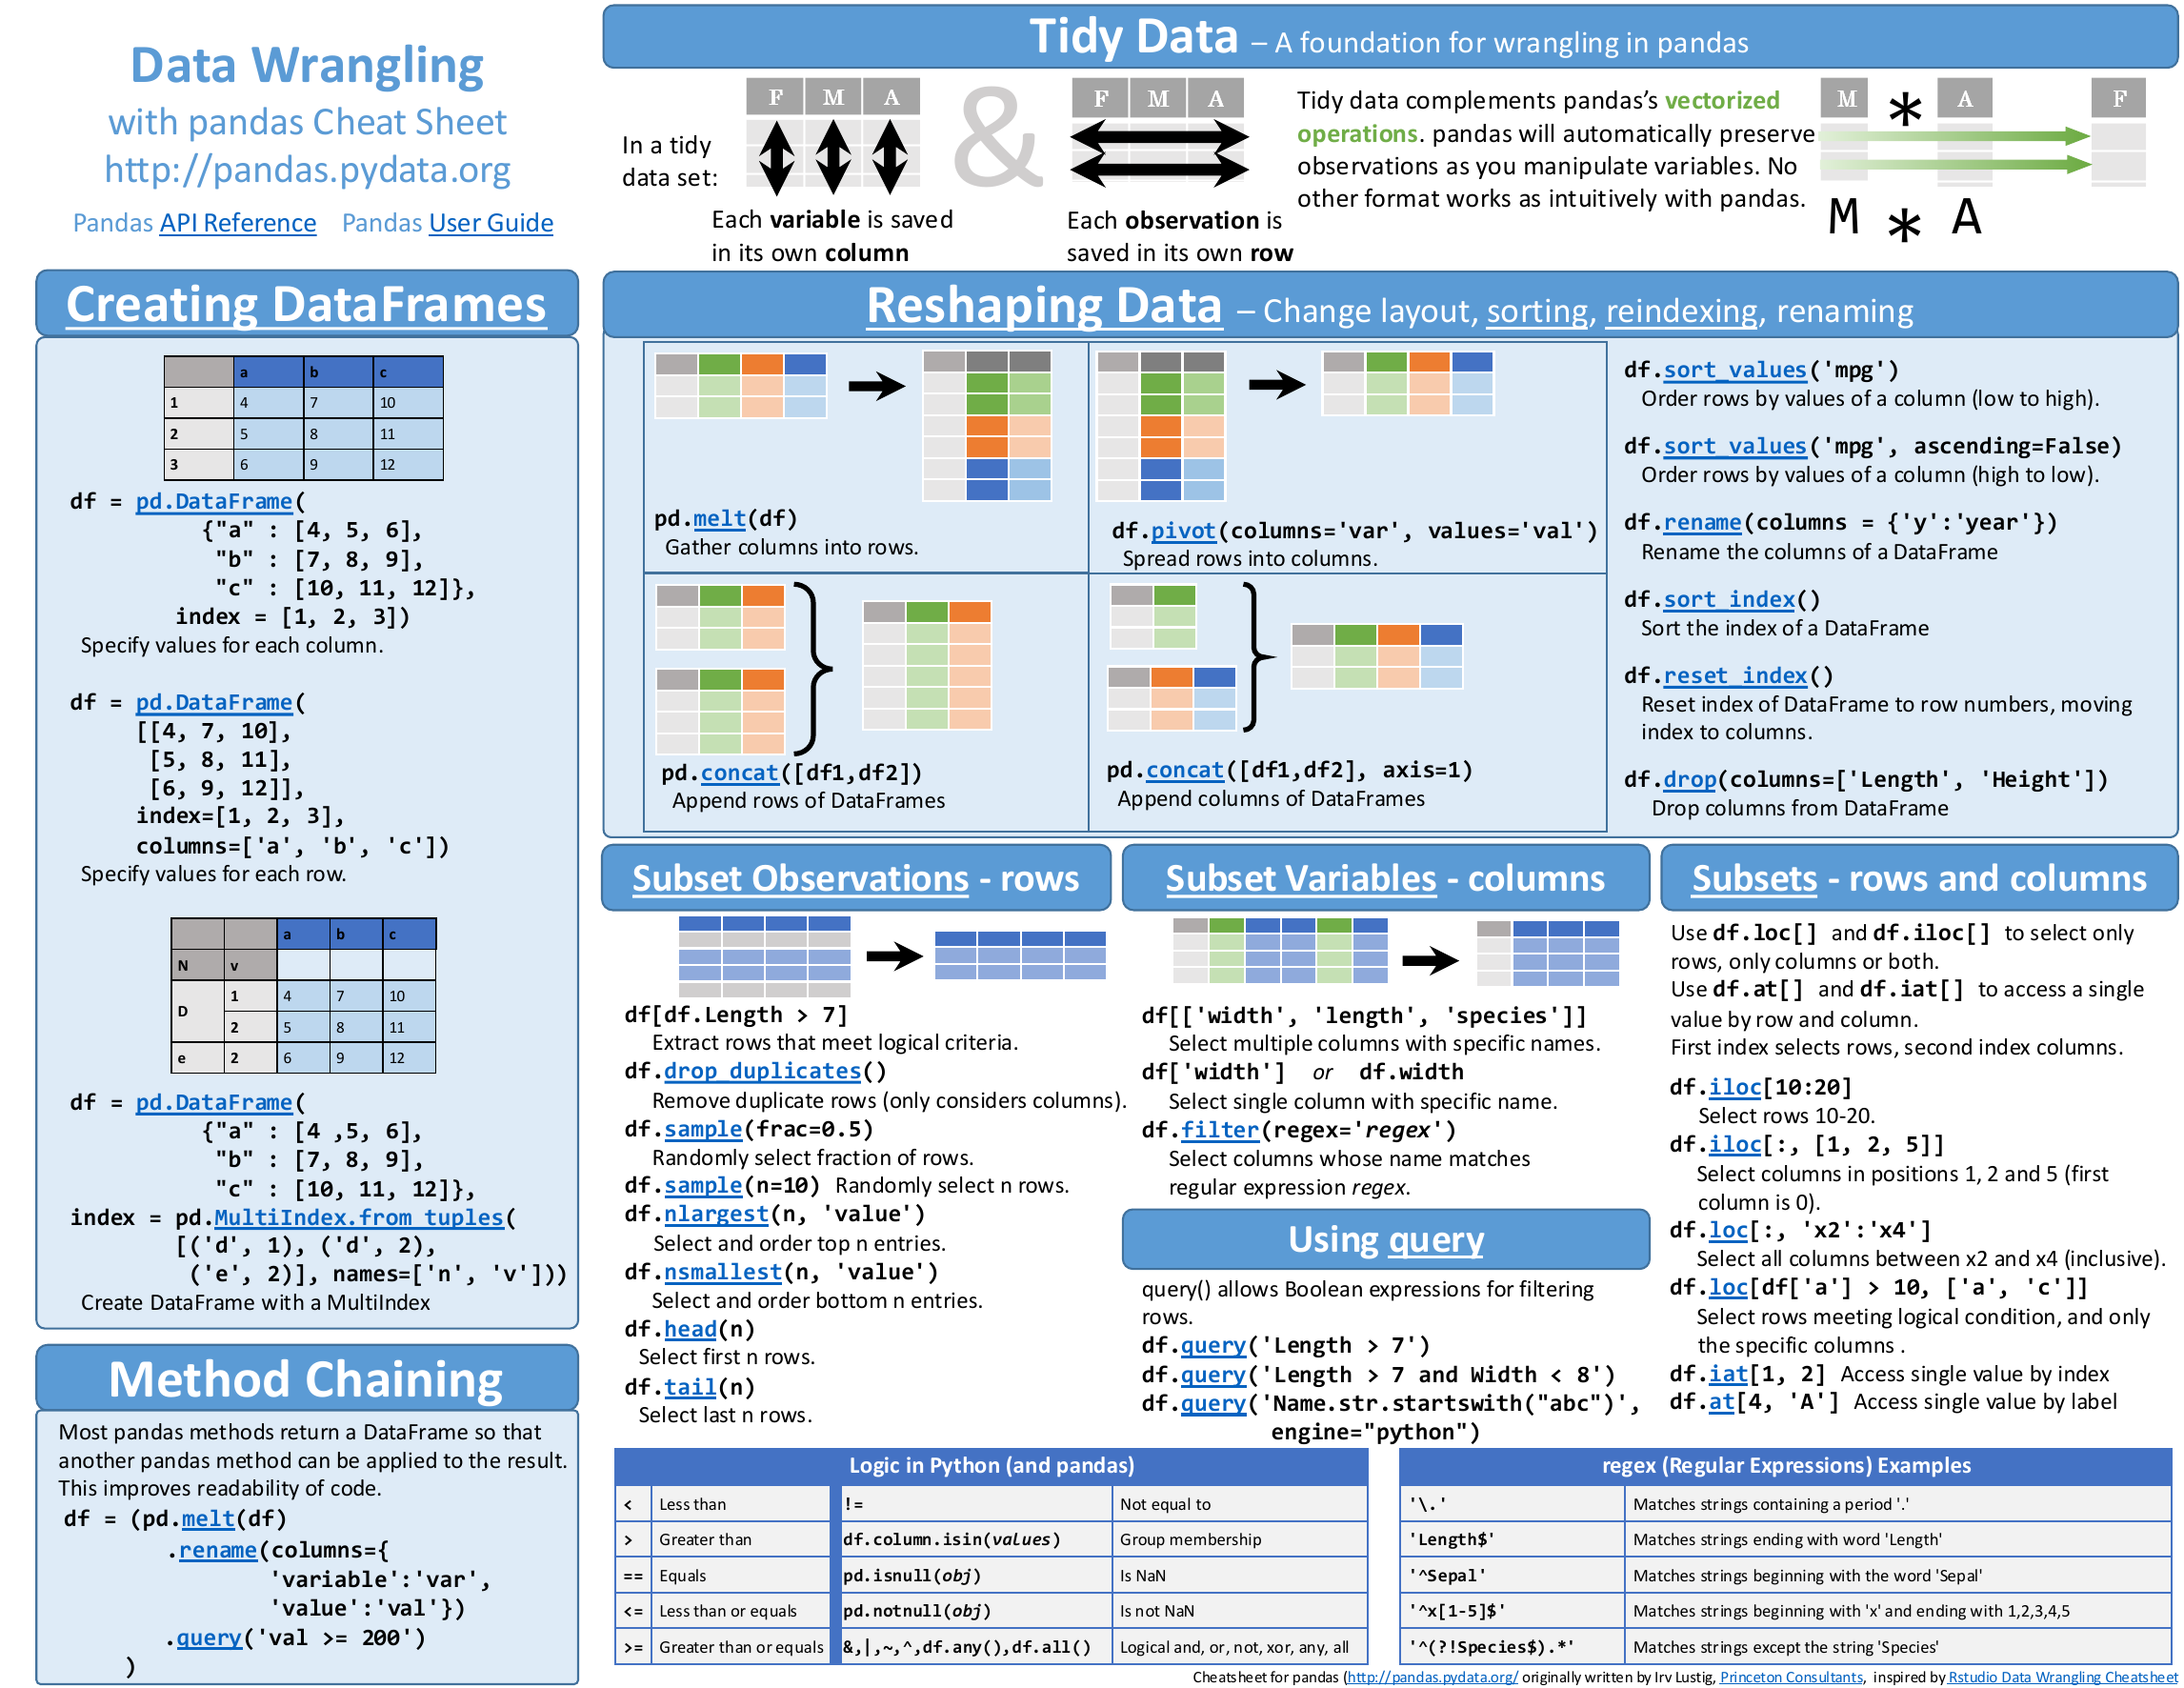

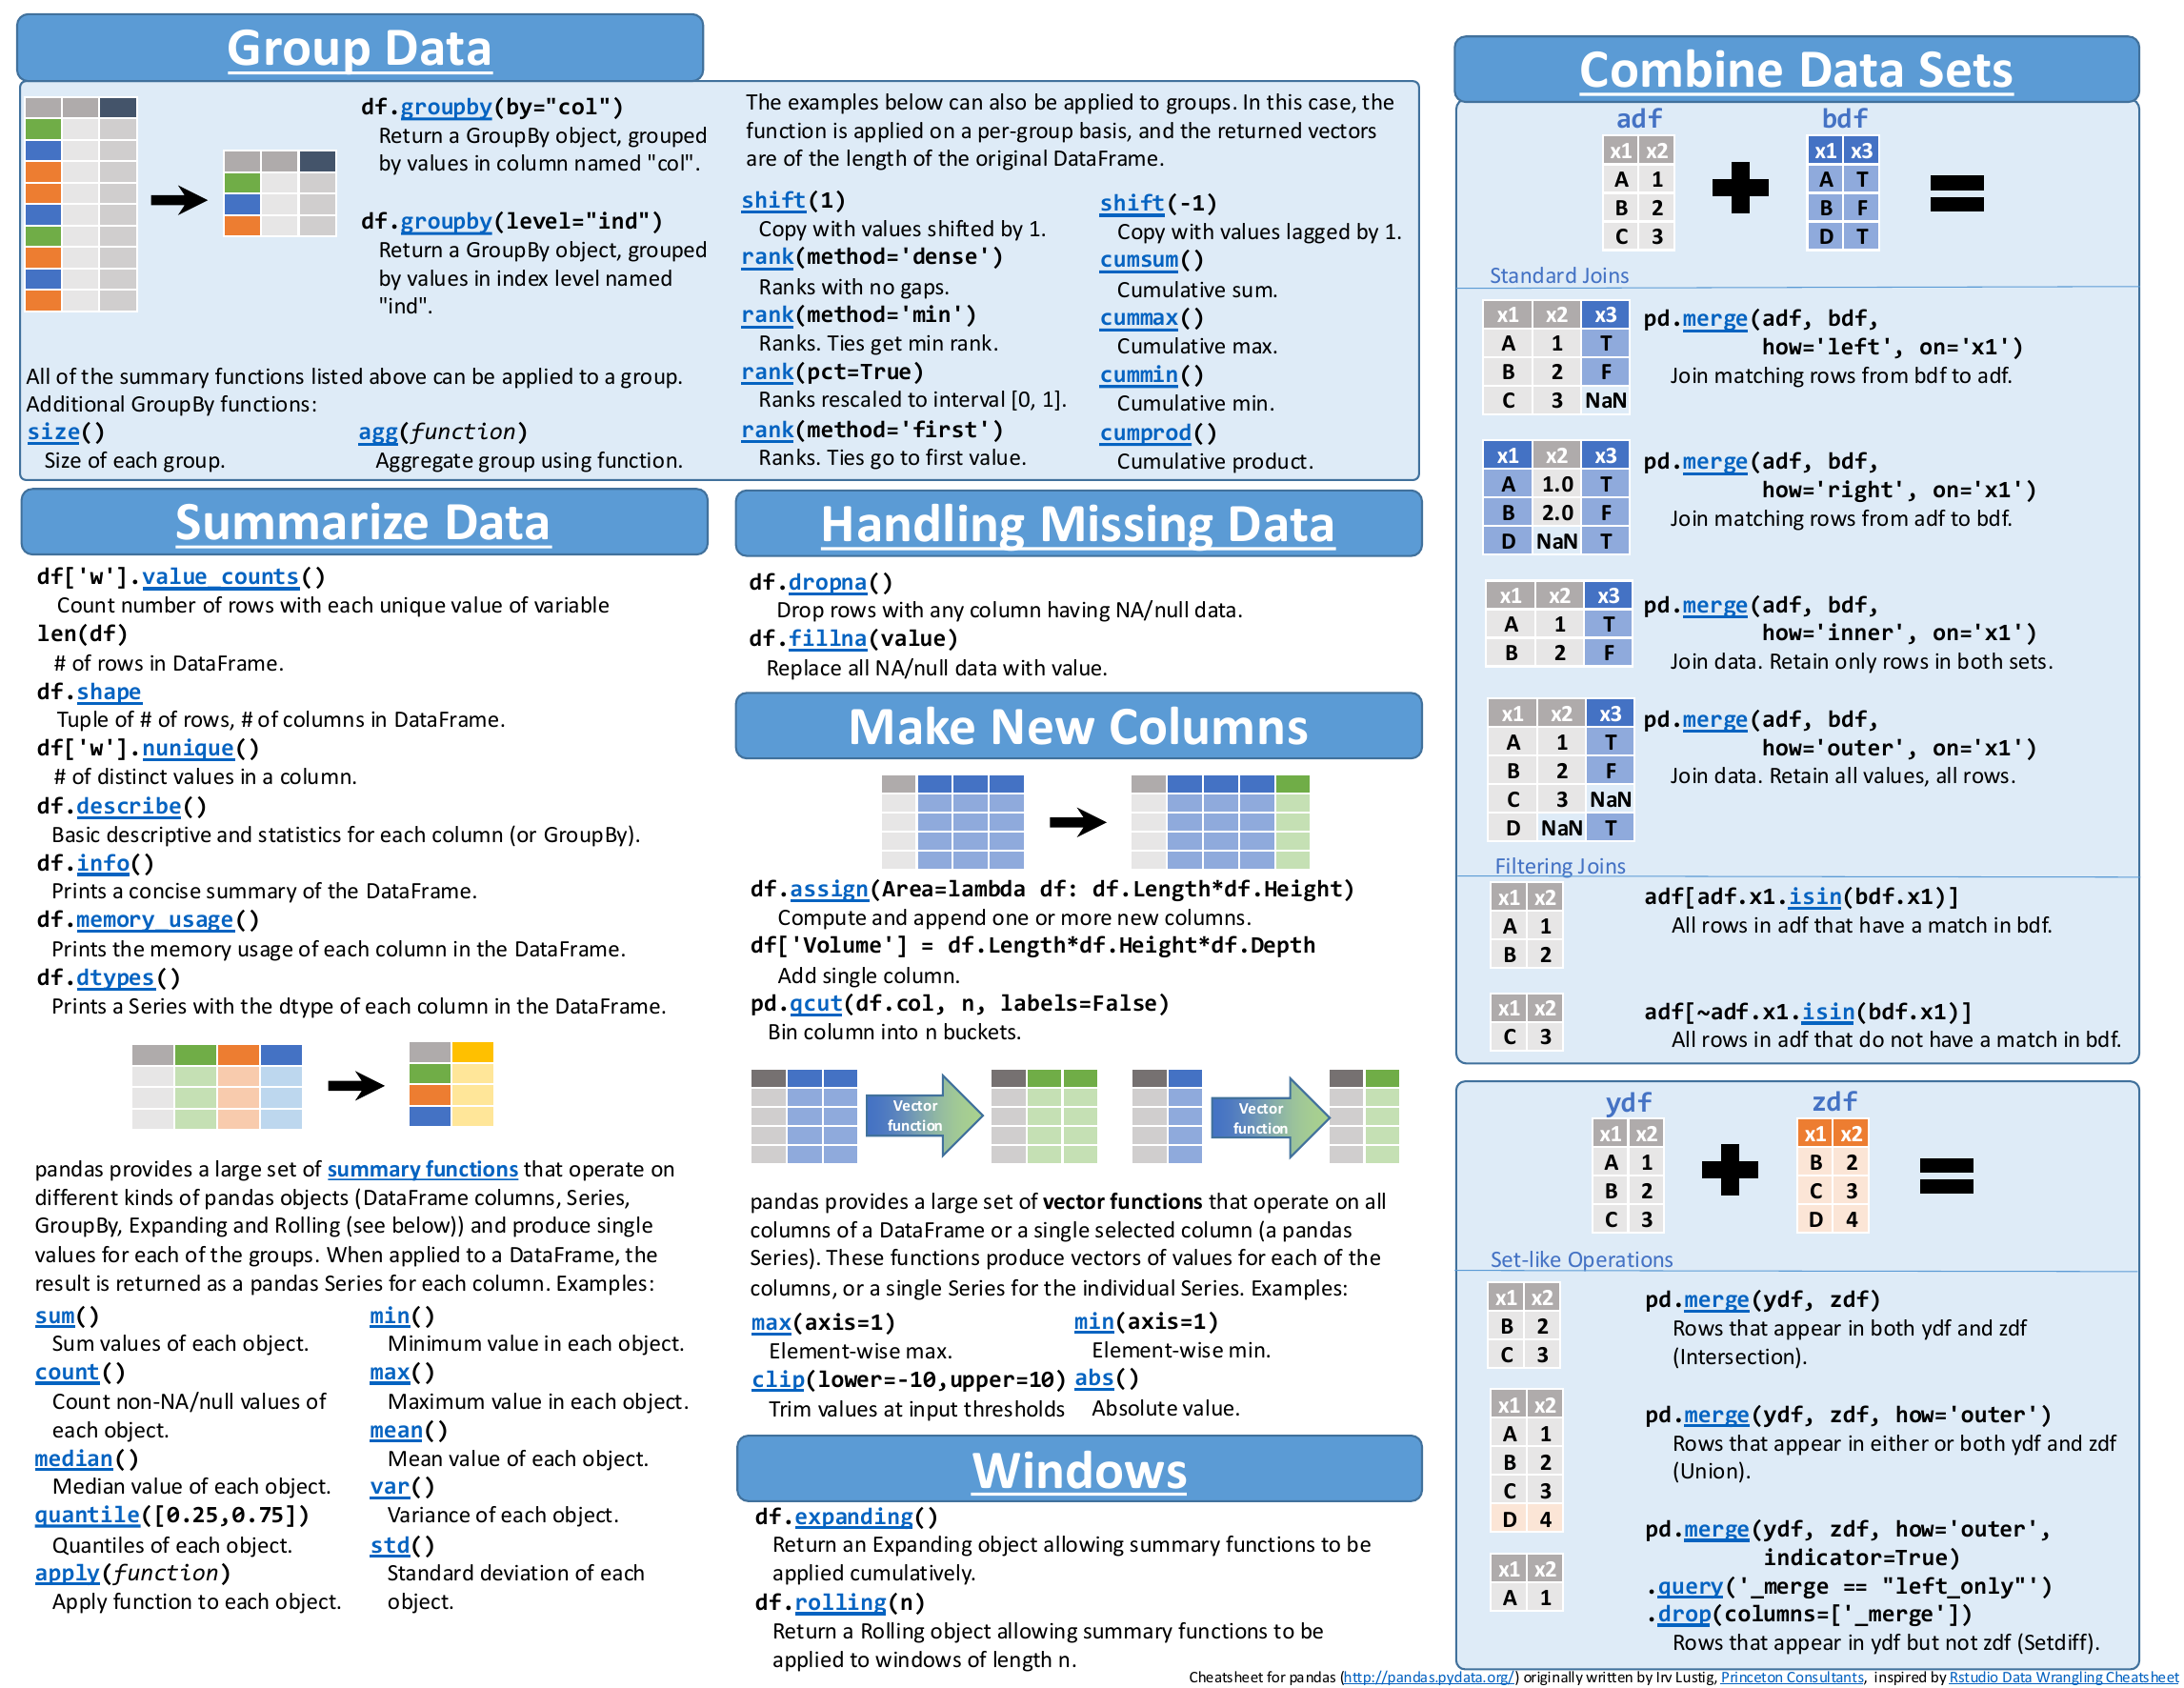

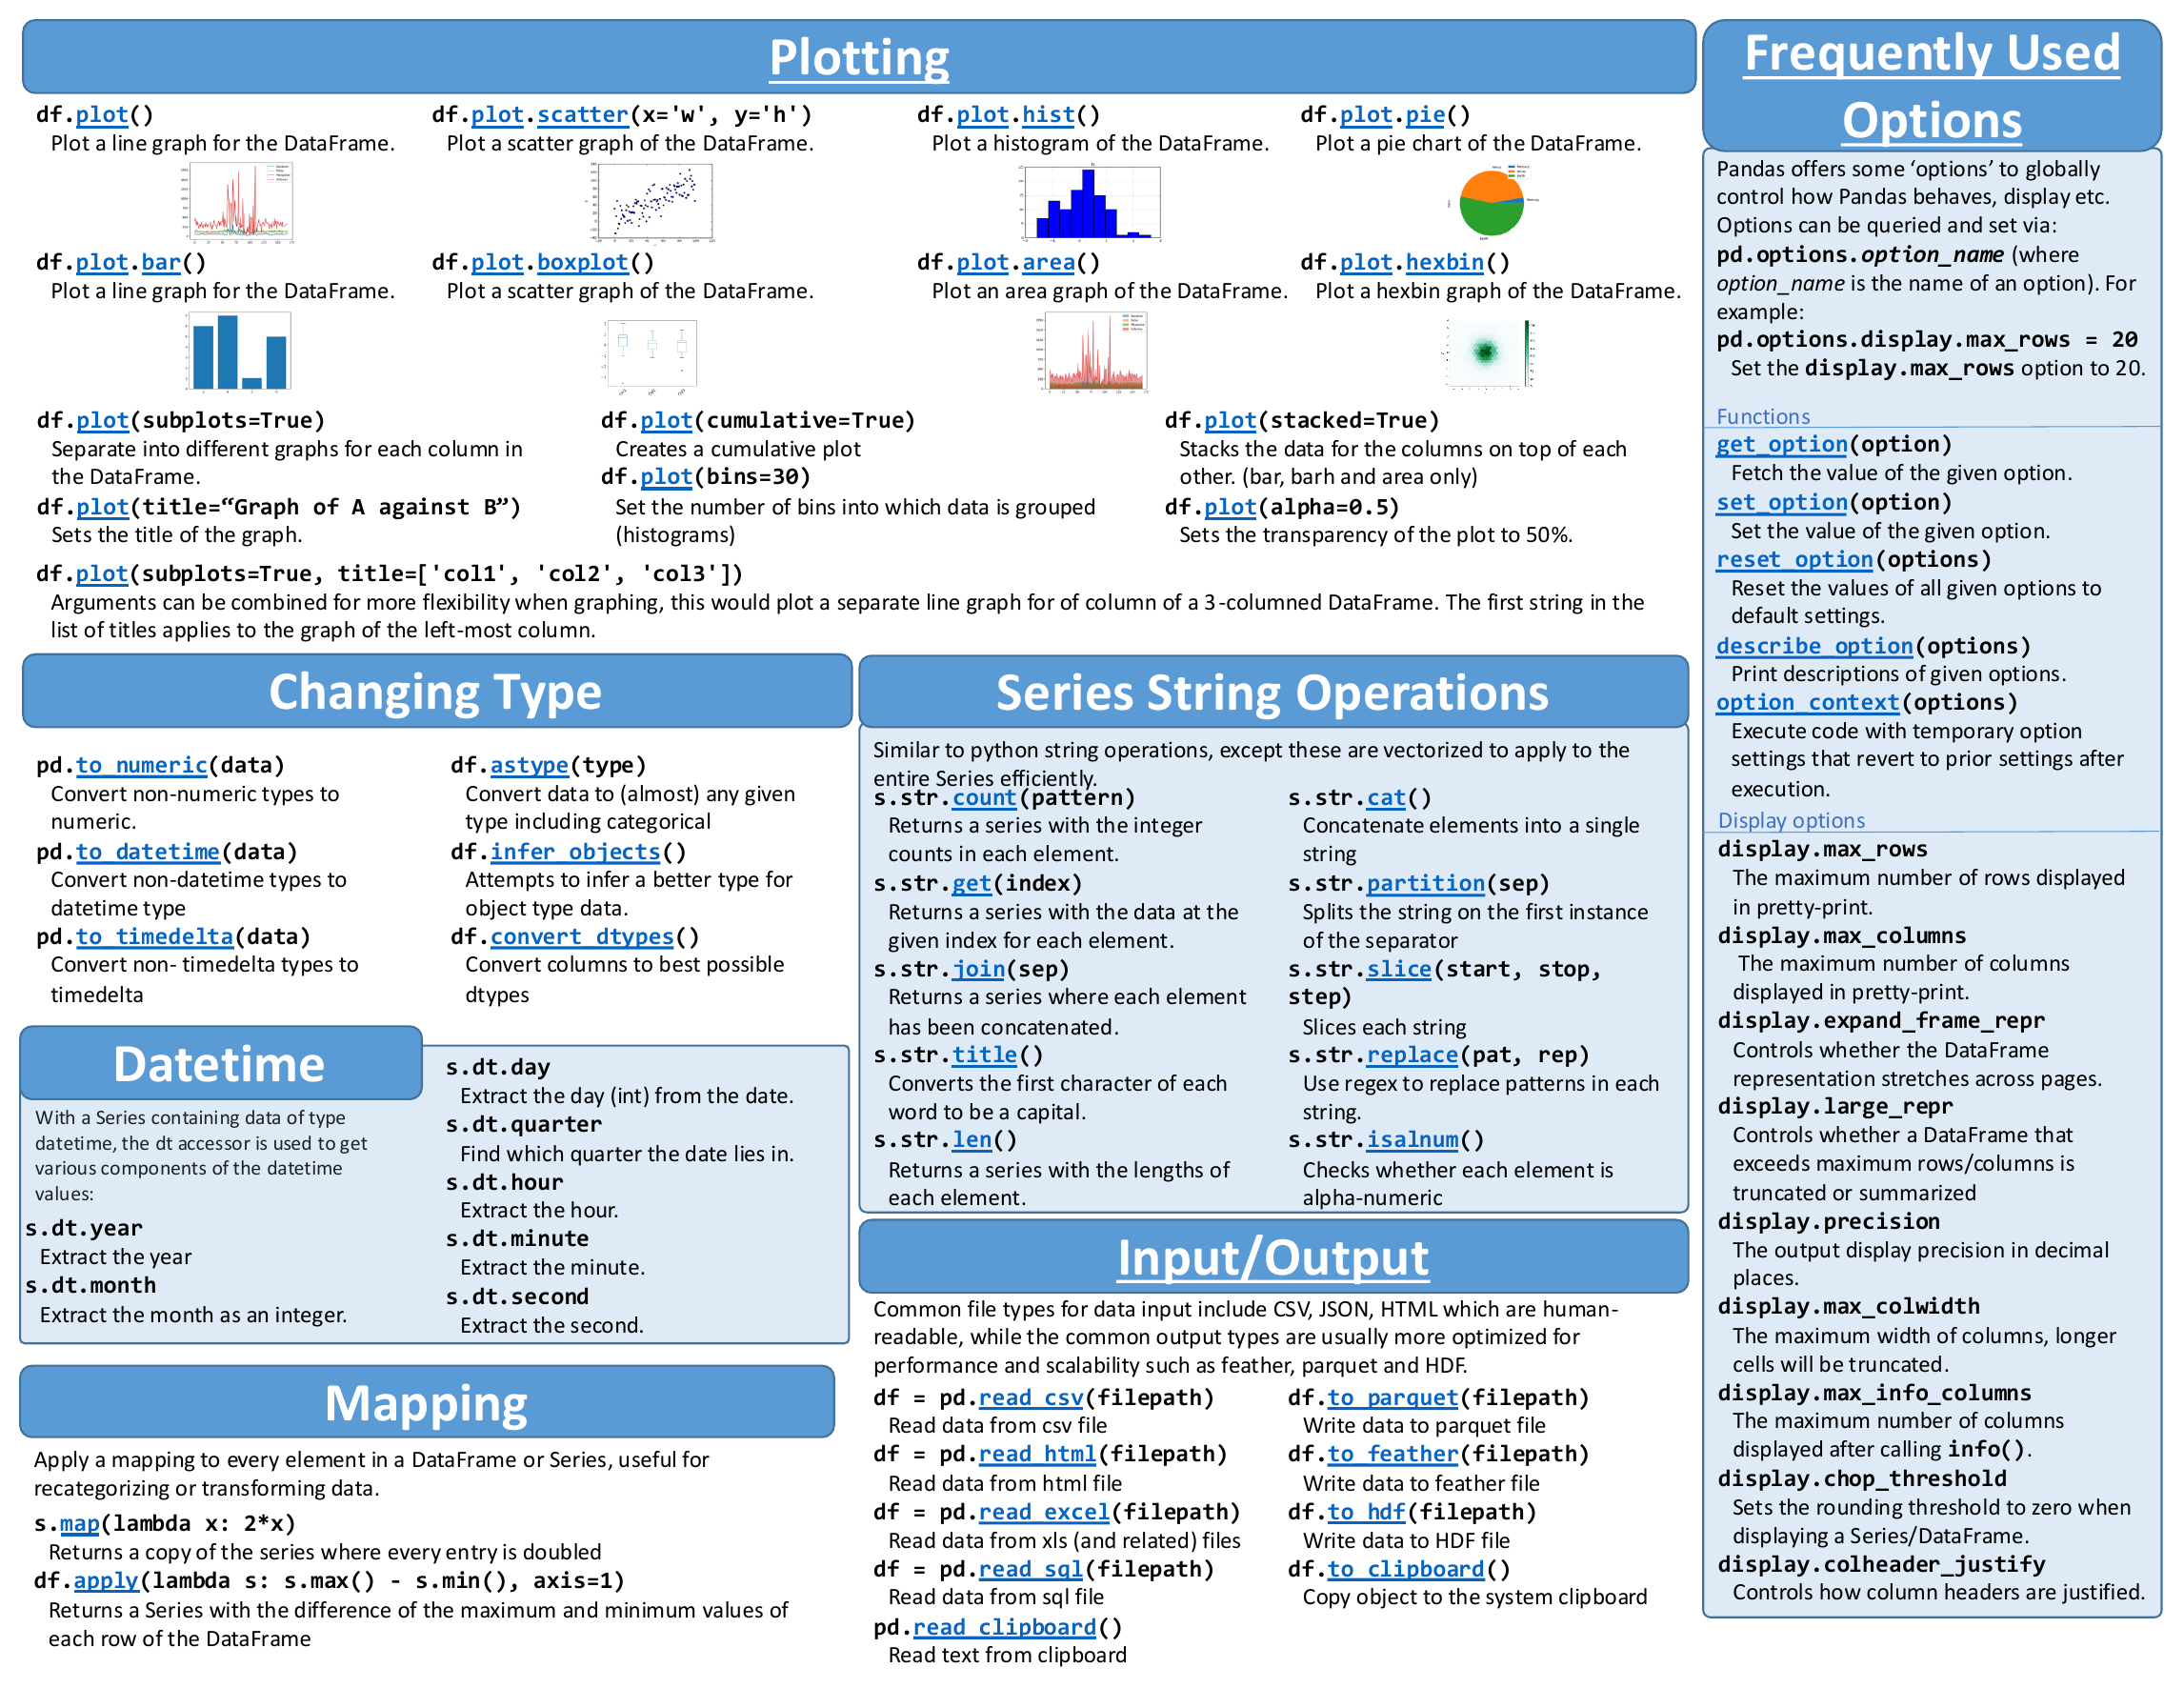

In [10]:
display(pages[0])
display(pages[1])
display(pages[2])

## Writing to files

In [11]:
#df.to_csv()

## Dataframe basics

Viewing samples of your dataframe

.head(n) - displays the first *n* rows of your dataframe  
.tail(n) - displays the last *n* rows of your dataframe  
.sample(n) - displays a random sample of *n* rows in your dataframe 

Setting random_state ensures the random sample remains the same each time the cell is run

In [12]:
df.head(3)

FlightDate                                    Airline Origin Dest  Cancelled  Diverted  CRSDepTime  DepTime  DepDelayMinutes  DepDelay  ArrTime  ArrDelayMinutes  AirTime  CRSElapsedTime  ActualElapsedTime  Distance  Year  Quarter  Month  DayofMonth  DayOfWeek Marketing_Airline_Network Operated_or_Branded_Code_Share_Partners  DOT_ID_Marketing_Airline IATA_Code_Marketing_Airline  Flight_Number_Marketing_Airline Operating_Airline  DOT_ID_Operating_Airline IATA_Code_Operating_Airline Tail_Number  Flight_Number_Operating_Airline  OriginAirportID  OriginAirportSeqID  OriginCityMarketID            OriginCityName OriginState  OriginStateFips OriginStateName  OriginWac  DestAirportID  DestAirportSeqID  DestCityMarketID DestCityName DestState  DestStateFips DestStateName  DestWac  DepDel15  DepartureDelayGroups DepTimeBlk  TaxiOut  WheelsOff  WheelsOn  TaxiIn  CRSArrTime  ArrDelay  ArrDel15  ArrivalDelayGroups ArrTimeBlk  DistanceGroup  DivAirportLandings
0  2022-04-04  Commutair Aka Champlain Enterprises, Inc.    GJT  DEN      False     False        1133   1123.0              0.0     -10.0   1228.0              0.0     40.0            72.0               65.0     212.0  2022        2      4           4          1                        UA                            UA_CODESHARE                     19977                          UA                             4301                C5                     20445                          C5      N21144                             4301            11921             1192102               31921        Grand Junction, CO          CO                8        Colorado         82          11292           1129202             30325   Denver, CO        CO              8      Colorado       82       0.0                  -1.0  1100-1159     17.0     1140.0    1220.0     8.0        1245     -17.0       0.0                -2.0  1200-1259              1                   0
1  2022-04-04  Commutair Aka Champlain Enterprises, Inc.    HRL  IAH      False     False         732    728.0              0.0      -4.0    848.0              0.0     55.0            77.0               80.0     295.0  2022        2      4           4          1                        UA                            UA_CODESHARE                     19977                          UA                             4299                C5                     20445                          C5      N16170                             4299            12206             1220605               32206  Harlingen/San Benito, TX          TX               48           Texas         74          12266           1226603             31453  Houston, TX        TX             48         Texas       74       0.0                  -1.0  0700-0759     16.0      744.0     839.0     9.0         849      -1.0       0.0                -1.0  0800-0859              2                   0
2  2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN      False     False        1529   1514.0              0.0     -15.0   1636.0              0.0     47.0            70.0               82.0     251.0  2022        2      4           4          1                        UA                            UA_CODESHARE                     19977                          UA                             4298                C5                     20445                          C5      N21144                             4298            11413             1141307               30285               Durango, CO          CO                8        Colorado         82          11292           1129202             30325   Denver, CO        CO              8      Colorado       82       0.0                  -1.0  1500-1559     21.0     1535.0    1622.0    14.0        1639      -3.0       0.0                -1.0  1600-1659              2                   0

In [13]:
df.tail(3)

FlightDate            Airline Origin Dest  Cancelled  Diverted  CRSDepTime  DepTime  DepDelayMinutes  DepDelay  ArrTime  ArrDelayMinutes  AirTime  CRSElapsedTime  ActualElapsedTime  Distance  Year  Quarter  Month  DayofMonth  DayOfWeek Marketing_Airline_Network Operated_or_Branded_Code_Share_Partners  DOT_ID_Marketing_Airline IATA_Code_Marketing_Airline  Flight_Number_Marketing_Airline Operating_Airline  DOT_ID_Operating_Airline IATA_Code_Operating_Airline Tail_Number  Flight_Number_Operating_Airline  OriginAirportID  OriginAirportSeqID  OriginCityMarketID OriginCityName OriginState  OriginStateFips OriginStateName  OriginWac  DestAirportID  DestAirportSeqID  DestCityMarketID        DestCityName DestState  DestStateFips   DestStateName  DestWac  DepDel15  DepartureDelayGroups DepTimeBlk  TaxiOut  WheelsOff  WheelsOn  TaxiIn  CRSArrTime  ArrDelay  ArrDel15  ArrivalDelayGroups ArrTimeBlk  DistanceGroup  DivAirportLandings
4078315  2022-03-08  Republic Airlines    ALB  ORD      False     False        1700   2318.0            378.0     378.0     59.0            381.0    135.0           158.0              161.0     723.0  2022        1      3           8          2                        UA                            UA_CODESHARE                     19977                          UA                             3413                YX                     20452                          YX      N733YX                             3413            10257             1025702               30257     Albany, NY          NY               36        New York         22          13930           1393007             30977         Chicago, IL        IL             17        Illinois       41       1.0                  12.0  1700-1759     19.0     2337.0      52.0     7.0        1838     381.0       1.0                12.0  1800-1859              3                   0
4078316  2022-03-25  Republic Airlines    EWR  PIT      False      True        2129   2322.0            113.0     113.0    939.0              NaN      NaN            86.0                NaN     319.0  2022        1      3          25          5                        UA                            UA_CODESHARE                     19977                          UA                             3450                YX                     20452                          YX      N647RW                             3450            11618             1161802               31703     Newark, NJ          NJ               34      New Jersey         21          14122           1412202             30198      Pittsburgh, PA        PA             42    Pennsylvania       23       1.0                   7.0  2100-2159     25.0     2347.0     933.0     6.0        2255       NaN       NaN                 NaN  2200-2259              2                   1
4078317  2022-03-07  Republic Airlines    EWR  RDU      False      True        1154   1148.0              0.0      -6.0   1556.0              NaN      NaN            99.0                NaN     416.0  2022        1      3           7          1                        UA                            UA_CODESHARE                     19977                          UA                             3585                YX                     20452                          YX      N648RW                             3585            11618             1161802               31703     Newark, NJ          NJ               34      New Jersey         21          14492           1449202             34492  Raleigh/Durham, NC        NC             37  North Carolina       36       0.0                  -1.0  1100-1159     13.0     1201.0    1552.0     4.0        1333       NaN       NaN                 NaN  1300-1359              2                   1

In [14]:
df.sample(3, random_state=42)

FlightDate                 Airline Origin Dest  Cancelled  Diverted  CRSDepTime  DepTime  DepDelayMinutes  DepDelay  ArrTime  ArrDelayMinutes  AirTime  CRSElapsedTime  ActualElapsedTime  Distance  Year  Quarter  Month  DayofMonth  DayOfWeek Marketing_Airline_Network Operated_or_Branded_Code_Share_Partners  DOT_ID_Marketing_Airline IATA_Code_Marketing_Airline  Flight_Number_Marketing_Airline Operating_Airline  DOT_ID_Operating_Airline IATA_Code_Operating_Airline Tail_Number  Flight_Number_Operating_Airline  OriginAirportID  OriginAirportSeqID  OriginCityMarketID   OriginCityName OriginState  OriginStateFips OriginStateName  OriginWac  DestAirportID  DestAirportSeqID  DestCityMarketID DestCityName DestState  DestStateFips DestStateName  DestWac  DepDel15  DepartureDelayGroups DepTimeBlk  TaxiOut  WheelsOff  WheelsOn  TaxiIn  CRSArrTime  ArrDelay  ArrDel15  ArrivalDelayGroups ArrTimeBlk  DistanceGroup  DivAirportLandings
3811797  2022-03-19   SkyWest Airlines Inc.    ASE  DEN      False     False        1831   1826.0              0.0      -5.0   1923.0              0.0     31.0            62.0               57.0     125.0  2022        1      3          19          6                        UA                            UA_CODESHARE                     19977                          UA                             5745                OO                     20304                          OO      N794SK                             5745            10372             1037205               30372        Aspen, CO          CO                8        Colorado         82          11292           1129202             30325   Denver, CO        CO              8      Colorado       82       0.0                  -1.0  1800-1859     19.0     1845.0    1916.0     7.0        1933     -10.0       0.0                -1.0  1900-1959              1                   0
615029   2022-02-16   SkyWest Airlines Inc.    TYS  DEN      False     False        1605   1605.0              0.0       0.0   1812.0             35.0    194.0           212.0              247.0    1162.0  2022        1      2          16          3                        UA                            UA_CODESHARE                     19977                          UA                             5733                OO                     20304                          OO      N127SY                             5733            15412             1541205               35412    Knoxville, TN          TN               47       Tennessee         54          11292           1129202             30325   Denver, CO        CO              8      Colorado       82       0.0                   0.0  1600-1659      9.0     1614.0    1728.0    44.0        1737      35.0       1.0                 2.0  1700-1759              5                   0
3228533  2022-01-18  American Airlines Inc.    LAX  OGG      False     False        1719   1714.0              0.0      -5.0   2052.0              3.0    314.0           330.0              338.0    2486.0  2022        1      1          18          2                        AA                                      AA                     19805                          AA                              205                AA                     19805                          AA      N400AN                              205            12892             1289208               32575  Los Angeles, CA          CA                6      California         91          13830           1383002             33830  Kahului, HI        HI             15        Hawaii        2       0.0                  -1.0  1700-1759     14.0     1728.0    2042.0    10.0        2049       3.0       0.0                 0.0  2000-2059             10                   0

In [15]:
df.sample(frac=0.000001, random_state=42)

FlightDate                 Airline Origin Dest  Cancelled  Diverted  CRSDepTime  DepTime  DepDelayMinutes  DepDelay  ArrTime  ArrDelayMinutes  AirTime  CRSElapsedTime  ActualElapsedTime  Distance  Year  Quarter  Month  DayofMonth  DayOfWeek Marketing_Airline_Network Operated_or_Branded_Code_Share_Partners  DOT_ID_Marketing_Airline IATA_Code_Marketing_Airline  Flight_Number_Marketing_Airline Operating_Airline  DOT_ID_Operating_Airline IATA_Code_Operating_Airline Tail_Number  Flight_Number_Operating_Airline  OriginAirportID  OriginAirportSeqID  OriginCityMarketID   OriginCityName OriginState  OriginStateFips OriginStateName  OriginWac  DestAirportID  DestAirportSeqID  DestCityMarketID   DestCityName DestState  DestStateFips DestStateName  DestWac  DepDel15  DepartureDelayGroups DepTimeBlk  TaxiOut  WheelsOff  WheelsOn  TaxiIn  CRSArrTime  ArrDelay  ArrDel15  ArrivalDelayGroups ArrTimeBlk  DistanceGroup  DivAirportLandings
3811797  2022-03-19   SkyWest Airlines Inc.    ASE  DEN      False     False        1831   1826.0              0.0      -5.0   1923.0              0.0     31.0            62.0               57.0     125.0  2022        1      3          19          6                        UA                            UA_CODESHARE                     19977                          UA                             5745                OO                     20304                          OO      N794SK                             5745            10372             1037205               30372        Aspen, CO          CO                8        Colorado         82          11292           1129202             30325     Denver, CO        CO              8      Colorado       82       0.0                  -1.0  1800-1859     19.0     1845.0    1916.0     7.0        1933     -10.0       0.0                -1.0  1900-1959              1                   0
615029   2022-02-16   SkyWest Airlines Inc.    TYS  DEN      False     False        1605   1605.0              0.0       0.0   1812.0             35.0    194.0           212.0              247.0    1162.0  2022        1      2          16          3                        UA                            UA_CODESHARE                     19977                          UA                             5733                OO                     20304                          OO      N127SY                             5733            15412             1541205               35412    Knoxville, TN          TN               47       Tennessee         54          11292           1129202             30325     Denver, CO        CO              8      Colorado       82       0.0                   0.0  1600-1659      9.0     1614.0    1728.0    44.0        1737      35.0       1.0                 2.0  1700-1759              5                   0
3228533  2022-01-18  American Airlines Inc.    LAX  OGG      False     False        1719   1714.0              0.0      -5.0   2052.0              3.0    314.0           330.0              338.0    2486.0  2022        1      1          18          2                        AA                                      AA                     19805                          AA                              205                AA                     19805                          AA      N400AN                              205            12892             1289208               32575  Los Angeles, CA          CA                6      California         91          13830           1383002             33830    Kahului, HI        HI             15        Hawaii        2       0.0                  -1.0  1700-1759     14.0     1728.0    2042.0    10.0        2049       3.0       0.0                 0.0  2000-2059             10                   0
3129490  2022-01-23  Southwest Airlines Co.    LAS  BWI      False     False        1515   1533.0             18.0      18.0   2302.0             27.0    251.0           260.0              269.0    2106.0  2022        1      1          2

Pandas Object Attributes

Unlike methods that take parameters (), attributes return information about the object


| Attribute | What it gives                             | Example                                    |
|-----------|-------------------------------------------|--------------------------------------------|
| `.columns` | Index (list-like) of column names         | `df.columns` → `Index(['A','B','C'])`      |
| `.index`   | Index (row labels) of the DataFrame       | `df.index` → `RangeIndex(start=0, stop=10)`|
| `.shape`   | Tuple (rows, columns)                     | `df.shape` → `(10, 3)`                     |
| `.dtypes`  | Data types of each column                 | `df.dtypes` → `A int64, B float64`         |
| `.size`    | Total number of elements (rows × cols)    | `df.size` → `30`                           |
| `.ndim`    | Number of dimensions (usually 2 for df)   | `df.ndim` → `2`                            |
| `.values`  | Underlying NumPy array                    | `df.values` → `np.array`                   |
| `.axes`    | List with `[index, columns]`              | `df.axes` → `[RangeIndex(...), Index(...)]`|

In [16]:
df.columns

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOu

In [17]:
df.index

RangeIndex(start=0, stop=4078318, step=1)

In [18]:
df['Airline'].values

array(['Commutair Aka Champlain Enterprises, Inc.',
       'Commutair Aka Champlain Enterprises, Inc.',
       'Commutair Aka Champlain Enterprises, Inc.', ...,
       'Republic Airlines', 'Republic Airlines', 'Republic Airlines'],
      shape=(4078318,), dtype=object)

## Dataframe summary

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078318 entries, 0 to 4078317
Data columns (total 61 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   FlightDate                               object 
 1   Airline                                  object 
 2   Origin                                   object 
 3   Dest                                     object 
 4   Cancelled                                bool   
 5   Diverted                                 bool   
 6   CRSDepTime                               int64  
 7   DepTime                                  float64
 8   DepDelayMinutes                          float64
 9   DepDelay                                 float64
 10  ArrTime                                  float64
 11  ArrDelayMinutes                          float64
 12  AirTime                                  float64
 13  CRSElapsedTime                           float64
 14  ActualElapsedTime 

In [20]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078318 entries, 0 to 4078317
Columns: 61 entries, FlightDate to DivAirportLandings
dtypes: bool(2), float64(18), int64(23), object(18)
memory usage: 1.8+ GB


In [21]:
df.describe()

CRSDepTime       DepTime  DepDelayMinutes      DepDelay       ArrTime  ArrDelayMinutes       AirTime  CRSElapsedTime  ActualElapsedTime      Distance       Year       Quarter         Month    DayofMonth     DayOfWeek  DOT_ID_Marketing_Airline  Flight_Number_Marketing_Airline  DOT_ID_Operating_Airline  Flight_Number_Operating_Airline  OriginAirportID  OriginAirportSeqID  OriginCityMarketID  OriginStateFips     OriginWac  DestAirportID  DestAirportSeqID  DestCityMarketID  DestStateFips       DestWac      DepDel15  DepartureDelayGroups       TaxiOut     WheelsOff      WheelsOn        TaxiIn    CRSArrTime      ArrDelay      ArrDel15  ArrivalDelayGroups  DistanceGroup  DivAirportLandings
count  4.078318e+06  3.957885e+06     3.957823e+06  3.957823e+06  3.954079e+06     3.944916e+06  3.944916e+06    4.078318e+06       3.944916e+06  4.078318e+06  4078318.0  4.078318e+06  4.078318e+06  4.078318e+06  4.078318e+06              4.078318e+06                     4.078318e+06              4.078318e+06                     4.078318e+06     4.078318e+06        4.078318e+06        4.078318e+06     4.078318e+06  4.078318e+06   4.078318e+06      4.078318e+06      4.078318e+06   4.078318e+06  4.078318e+06  3.957823e+06          3.957823e+06  3.955652e+06  3.955652e+06  3.954076e+06  3.954076e+06  4.078318e+06  3.944916e+06  3.944916e+06        3.944916e+06   4.078318e+06        4.078318e+06
mean   1.329587e+03  1.334374e+03     1.601494e+01  1.309049e+01  1.457886e+03     1.578307e+01  1.110075e+02    1.413211e+02       1.358624e+02  7.978657e+02     2022.0  1.741207e+00  4.083803e+00  1.571131e+01  4.005566e+00              1.983101e+04                     2.562115e+03              1.999122e+04                     2.562145e+03     1.265994e+04        1.265998e+06        3.175708e+04     2.746504e+01  5.399368e+01   1.265990e+04      1.265994e+06      3.175704e+04   2.746550e+01  5.399338e+01  2.184625e-01          2.141248e-01  1.697375e+01  1.356576e+03  1.455073e+03  7.894387e+00  1.486058e+03  7.528486e+00  2.164715e-01       -6.256103e-02   3.663516e+00        3.685098e-03
std    4.904801e+02  5.056219e+02     5.231498e+01  5.332016e+01  5.431841e+02     5.198424e+01  6.996246e+01    7.179635e+01       7.185501e+01  5.914742e+02        0.0  7.037563e-01  1.998918e+00  8.760122e+00  2.007050e+00              2.760907e+02                     1.745826e+03              3.767694e+02                     1.745873e+03     1.522713e+03        1.522711e+05        1.320296e+03     1.670547e+01  2.664820e+01   1.522718e+03      1.522716e+05      1.320286e+03   1.670567e+01  2.664849e+01  4.132030e-01          2.345973e+00  9.495407e+00  5.075580e+02  5.378428e+02  6.663118e+00  5.185078e+02  5.524625e+01  4.118393e-01        2.487442e+00   2.320848e+00        1.141331e-01
min    1.000000e+00  1.000000e+00     0.000000e+00 -7.800000e+01  1.000000e+00     0.000000e+00  8.000000e+00   -4.800000e+01       1.400000e+01  3.100000e+01     2022.0  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00              1.939300e+04                     1.000000e+00              1.939300e+04                     1.000000e+00     1.013500e+04        1.013506e+06        3.007000e+04     1.000000e+00  1.000000e+00   1.013500e+04      1.013506e+06      3.007000e+04   1.000000e+00  1.000000e+00  0.000000e+00         -2.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00 -1.000000e+02  0.000000e+00       -2.000000e+00   1.000000e+00        0.000000e+00
25%    9.140000e+02  9.170000e+02     0.000000e+00 -5.000000e+00  1.046000e+03     0.000000e+00  6.000000e+01    8.900000e+01       8.300000e+01  3.680000e+02     2022.0  1.000000e+00  2.000000e+00  8.000000e+00  2.000000e+00              1.979000e+04                     1.105000e+03              1.979000e+04                     1.105000e+03     1.129200e+04        1.129202e+06        3.069300e+04     1.200000e+01  3.300000e+01   1.129200e+04      1.129202e+06      3.069300e+04   1.200000e+01  3.300

In [22]:
df[["Airline"]].describe()

Airline
count                  4078318
unique                      21
top     Southwest Airlines Co.
freq                    731925

In [23]:
df.shape, len(df)

((4078318, 61), 4078318)

In [24]:
type(df.shape)

tuple

In [25]:
df.select_dtypes('object').describe(include='all')

FlightDate                 Airline   Origin     Dest Marketing_Airline_Network Operated_or_Branded_Code_Share_Partners IATA_Code_Marketing_Airline Operating_Airline IATA_Code_Operating_Airline Tail_Number OriginCityName OriginState OriginStateName DestCityName DestState DestStateName DepTimeBlk ArrTimeBlk
count      4078318                 4078318  4078318  4078318                   4078318                                 4078318                     4078318           4078318                     4078318     4051523        4078318     4078318         4078318      4078318   4078318       4078318    4078318    4078318
unique         212                      21      375      375                        10                                      14                          10                21                          21        5896            369          53              53          369        53            53         19         19
top     2022-07-21  Southwest Airlines Co.      ATL      ATL                        AA                                      WN                          AA                WN                          WN      N475HA    Chicago, IL          TX           Texas  Chicago, IL        TX         Texas  0600-0659  1200-1259
freq         20844                  731925   183697   183671                   1043530                                  731925                     1043530            731925                      731925        1657         213487      426204          426204       213516    426207        426207     286192     256772

## Subsetting Columns

In [26]:
df[['FlightDate', 'Airline', 'Origin']]

FlightDate                                    Airline Origin
0        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    GJT
1        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    HRL
2        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO
3        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    IAH
4        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO
...             ...                                        ...    ...
4078313  2022-03-31                          Republic Airlines    MSY
4078314  2022-03-17                          Republic Airlines    CLT
4078315  2022-03-08                          Republic Airlines    ALB
4078316  2022-03-25                          Republic Airlines    EWR
4078317  2022-03-07                          Republic Airlines    EWR

[4078318 rows x 3 columns]

In [27]:
df[df.columns[:5]]

FlightDate                                    Airline Origin Dest  Cancelled
0        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    GJT  DEN      False
1        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    HRL  IAH      False
2        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN      False
3        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    IAH  GPT      False
4        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN      False
...             ...                                        ...    ...  ...        ...
4078313  2022-03-31                          Republic Airlines    MSY  EWR      False
4078314  2022-03-17                          Republic Airlines    CLT  EWR       True
4078315  2022-03-08                          Republic Airlines    ALB  ORD      False
4078316  2022-03-25                          Republic Airlines    EWR  PIT      False
4078317  2022-03-07                          Republic Airlines    EWR  RDU      False

[4078318 rows x 5 columns]

In [28]:
df[[c for c in df.columns if 'Time' in c]]

CRSDepTime  DepTime  ArrTime  AirTime  CRSElapsedTime  ActualElapsedTime DepTimeBlk  CRSArrTime ArrTimeBlk
0              1133   1123.0   1228.0     40.0            72.0               65.0  1100-1159        1245  1200-1259
1               732    728.0    848.0     55.0            77.0               80.0  0700-0759         849  0800-0859
2              1529   1514.0   1636.0     47.0            70.0               82.0  1500-1559        1639  1600-1659
3              1435   1430.0   1547.0     57.0            90.0               77.0  1400-1459        1605  1600-1659
4              1135   1135.0   1251.0     49.0            70.0               76.0  1100-1159        1245  1200-1259
...             ...      ...      ...      ...             ...                ...        ...         ...        ...
4078313        1949   2014.0    234.0      NaN           185.0                NaN  1900-1959        2354  2300-2359
4078314        1733   1817.0      NaN      NaN           129.0                NaN  1700-1759        1942  1900-1959
4078315        1700   2318.0     59.0    135.0           158.0              161.0  1700-1759        1838  1800-1859
4078316        2129   2322.0    939.0      NaN            86.0                NaN  2100-2159        2255  2200-2259
4078317        1154   1148.0   1556.0      NaN            99.0                NaN  1100-1159        1333  1300-1359

[4078318 rows x 9 columns]

## Select dtypes

In [29]:
df.select_dtypes('object')

FlightDate                                    Airline Origin Dest Marketing_Airline_Network Operated_or_Branded_Code_Share_Partners IATA_Code_Marketing_Airline Operating_Airline IATA_Code_Operating_Airline Tail_Number            OriginCityName OriginState OriginStateName         DestCityName DestState   DestStateName DepTimeBlk ArrTimeBlk
0        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    GJT  DEN                        UA                            UA_CODESHARE                          UA                C5                          C5      N21144        Grand Junction, CO          CO        Colorado           Denver, CO        CO        Colorado  1100-1159  1200-1259
1        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    HRL  IAH                        UA                            UA_CODESHARE                          UA                C5                          C5      N16170  Harlingen/San Benito, TX          TX           Texas          Houston, TX        TX           Texas  0700-0759  0800-0859
2        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN                        UA                            UA_CODESHARE                          UA                C5                          C5      N21144               Durango, CO          CO        Colorado           Denver, CO        CO        Colorado  1500-1559  1600-1659
3        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    IAH  GPT                        UA                            UA_CODESHARE                          UA                C5                          C5      N11184               Houston, TX          TX           Texas  Gulfport/Biloxi, MS        MS     Mississippi  1400-1459  1600-1659
4        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN                        UA                            UA_CODESHARE                          UA                C5                          C5      N17146               Durango, CO          CO        Colorado           Denver, CO        CO        Colorado  1100-1159  1200-1259
...             ...                                        ...    ...  ...                       ...                                     ...                         ...               ...                         ...         ...                       ...         ...             ...                  ...       ...             ...        ...        ...
4078313  2022-03-31                          Republic Airlines    MSY  EWR                        UA                            UA_CODESHARE                          UA                YX                          YX      N745YX           New Orleans, LA          LA       Louisiana           Newark, NJ        NJ      New Jersey  1900-1959  2300-2359
4078314  2022-03-17                          Republic Airlines    CLT  EWR                        UA                            UA_CODESHARE                          UA                YX                          YX      N654RW             Charlotte, NC          NC  North Carolina           Newark, NJ        NJ      New Jersey  1700-1759  1900-1959
4078315  2022-03-08                          Republic Airlines    ALB  ORD                        UA                            UA_CODESHARE                          UA                YX                          YX      N733YX                Albany, NY          NY        New York          Chicago, IL        IL        Illinois  1700-1759  1800-1859
4078316  2022-03-25                          Republic Airlines    EWR  PIT                        UA                            UA_CODESHARE                          UA                YX                          YX      N647RW                Newark, NJ          NJ      New Jersey       Pittsburgh, PA        PA    Pennsylvania  2100-2159  2200-2259
4078317  2022-03-07                          Republic Airlines    EWR  RDU                        UA                            UA_CODESHARE                   

## Select as series vs dataframe

In [30]:
# Select a series

df['Airline'].head()

0    Commutair Aka Champlain Enterprises, Inc.
1    Commutair Aka Champlain Enterprises, Inc.
2    Commutair Aka Champlain Enterprises, Inc.
3    Commutair Aka Champlain Enterprises, Inc.
4    Commutair Aka Champlain Enterprises, Inc.
Name: Airline, dtype: object

In [31]:
# Select a dataframe

df[['Airline']].head()

Airline
0  Commutair Aka Champlain Enterprises, Inc.
1  Commutair Aka Champlain Enterprises, Inc.
2  Commutair Aka Champlain Enterprises, Inc.
3  Commutair Aka Champlain Enterprises, Inc.
4  Commutair Aka Champlain Enterprises, Inc.

## loc and iloc

In [32]:
# iloc uses index locations '.iloc[row_index, col_index]'

df.iloc[1, 3]

'IAH'

In [33]:
# [all rows through:row_five, all cols through:col_five]

df.iloc[:5, :5]

FlightDate                                    Airline Origin Dest  Cancelled
0  2022-04-04  Commutair Aka Champlain Enterprises, Inc.    GJT  DEN      False
1  2022-04-04  Commutair Aka Champlain Enterprises, Inc.    HRL  IAH      False
2  2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN      False
3  2022-04-04  Commutair Aka Champlain Enterprises, Inc.    IAH  GPT      False
4  2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN      False

In [34]:
df.iloc[[5]]

FlightDate                                    Airline Origin Dest  Cancelled  Diverted  CRSDepTime  DepTime  DepDelayMinutes  DepDelay  ArrTime  ArrDelayMinutes  AirTime  CRSElapsedTime  ActualElapsedTime  Distance  Year  Quarter  Month  DayofMonth  DayOfWeek Marketing_Airline_Network Operated_or_Branded_Code_Share_Partners  DOT_ID_Marketing_Airline IATA_Code_Marketing_Airline  Flight_Number_Marketing_Airline Operating_Airline  DOT_ID_Operating_Airline IATA_Code_Operating_Airline Tail_Number  Flight_Number_Operating_Airline  OriginAirportID  OriginAirportSeqID  OriginCityMarketID OriginCityName OriginState  OriginStateFips OriginStateName  OriginWac  DestAirportID  DestAirportSeqID  DestCityMarketID DestCityName DestState  DestStateFips DestStateName  DestWac  DepDel15  DepartureDelayGroups DepTimeBlk  TaxiOut  WheelsOff  WheelsOn  TaxiIn  CRSArrTime  ArrDelay  ArrDel15  ArrivalDelayGroups ArrTimeBlk  DistanceGroup  DivAirportLandings
5  2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DEN  TUL      False     False         955    952.0              0.0      -3.0   1238.0              0.0     77.0           105.0              106.0     541.0  2022        2      4           4          1                        UA                            UA_CODESHARE                     19977                          UA                             4294                C5                     20445                          C5      N11191                             4294            11292             1129202               30325     Denver, CO          CO                8        Colorado         82          15370           1537002             34653    Tulsa, OK        OK             40      Oklahoma       73       0.0                  -1.0  0900-0959     25.0     1017.0    1234.0     4.0        1240      -2.0       0.0                -1.0  1200-1259              3                   0

In [35]:
df.iloc[:, 1]

0          Commutair Aka Champlain Enterprises, Inc.
1          Commutair Aka Champlain Enterprises, Inc.
2          Commutair Aka Champlain Enterprises, Inc.
3          Commutair Aka Champlain Enterprises, Inc.
4          Commutair Aka Champlain Enterprises, Inc.
                             ...                    
4078313                            Republic Airlines
4078314                            Republic Airlines
4078315                            Republic Airlines
4078316                            Republic Airlines
4078317                            Republic Airlines
Name: Airline, Length: 4078318, dtype: object

In [36]:
df.iloc[:, [1, 2]]

Airline Origin
0        Commutair Aka Champlain Enterprises, Inc.    GJT
1        Commutair Aka Champlain Enterprises, Inc.    HRL
2        Commutair Aka Champlain Enterprises, Inc.    DRO
3        Commutair Aka Champlain Enterprises, Inc.    IAH
4        Commutair Aka Champlain Enterprises, Inc.    DRO
...                                            ...    ...
4078313                          Republic Airlines    MSY
4078314                          Republic Airlines    CLT
4078315                          Republic Airlines    ALB
4078316                          Republic Airlines    EWR
4078317                          Republic Airlines    EWR

[4078318 rows x 2 columns]

In [37]:
df.loc[:, ['Airline', 'Origin']]

Airline Origin
0        Commutair Aka Champlain Enterprises, Inc.    GJT
1        Commutair Aka Champlain Enterprises, Inc.    HRL
2        Commutair Aka Champlain Enterprises, Inc.    DRO
3        Commutair Aka Champlain Enterprises, Inc.    IAH
4        Commutair Aka Champlain Enterprises, Inc.    DRO
...                                            ...    ...
4078313                          Republic Airlines    MSY
4078314                          Republic Airlines    CLT
4078315                          Republic Airlines    ALB
4078316                          Republic Airlines    EWR
4078317                          Republic Airlines    EWR

[4078318 rows x 2 columns]

## loc filter expressions

In [38]:
df.loc[df['Airline'] == 'Spirit Air Lines']

FlightDate           Airline Origin Dest  Cancelled  Diverted  CRSDepTime  DepTime  DepDelayMinutes  DepDelay  ArrTime  ArrDelayMinutes  AirTime  CRSElapsedTime  ActualElapsedTime  Distance  Year  Quarter  Month  DayofMonth  DayOfWeek Marketing_Airline_Network Operated_or_Branded_Code_Share_Partners  DOT_ID_Marketing_Airline IATA_Code_Marketing_Airline  Flight_Number_Marketing_Airline Operating_Airline  DOT_ID_Operating_Airline IATA_Code_Operating_Airline Tail_Number  Flight_Number_Operating_Airline  OriginAirportID  OriginAirportSeqID  OriginCityMarketID       OriginCityName OriginState  OriginStateFips OriginStateName  OriginWac  DestAirportID  DestAirportSeqID  DestCityMarketID   DestCityName DestState  DestStateFips DestStateName  DestWac  DepDel15  DepartureDelayGroups DepTimeBlk  TaxiOut  WheelsOff  WheelsOn  TaxiIn  CRSArrTime  ArrDelay  ArrDel15  ArrivalDelayGroups ArrTimeBlk  DistanceGroup  DivAirportLandings
407040   2022-04-01  Spirit Air Lines    FLL  ORD       True     False        2025      NaN              NaN       NaN      NaN              NaN      NaN           193.0                NaN    1182.0  2022        2      4           1          5                        NK                                      NK                     20416                          NK                                1                NK                     20416                          NK      N669NK                                1            11697             1169706               32467  Fort Lauderdale, FL          FL               12         Florida         33          13930           1393007             30977    Chicago, IL        IL             17      Illinois       41       NaN                   NaN  2000-2059      NaN        NaN       NaN     NaN        2238       NaN       NaN                 NaN  2200-2259              5                   0
407041   2022-04-02  Spirit Air Lines    FLL  ORD       True     False        2147      NaN              NaN       NaN      NaN              NaN      NaN           192.0                NaN    1182.0  2022        2      4           2          6                        NK                                      NK                     20416                          NK                                1                NK                     20416                          NK      N680NK                                1            11697             1169706               32467  Fort Lauderdale, FL          FL               12         Florida         33          13930           1393007             30977    Chicago, IL        IL             17      Illinois       41       NaN                   NaN  2100-2159      NaN        NaN       NaN     NaN        2359       NaN       NaN                 NaN  2300-2359              5                   0
407042   2022-04-03  Spirit Air Lines    FLL  ORD      False     False        2147    211.0            264.0     264.0    421.0            262.0    163.0           192.0              190.0    1182.0  2022        2      4           3          7                        NK                                      NK                     20416                          NK                                1                NK                     20416                          NK      N661NK                                1            11697             1169706               32467  Fort Lauderdale, FL          FL               12         Florida         33          13930           1393007             30977    Chicago, IL        IL             17      Illinois       41       1.0                  12.0  2100-2159     18.0      229.0     412.0     9.0        2359     262.0       1.0                12.0  2300-2359              5                   0
407043   2022-04-04  Spirit Air Lines    FLL  ORD      False     False        2147   2227.0             40.0      40.0     39.0             40.0    157.0           192.0              192.0    1182.0  2022        2      4           4          1  

In [39]:
df.loc[(df['Airline'] == 'Spirit Air Lines') & (df['FlightDate'] == '2022-03-30')]

FlightDate           Airline Origin Dest  Cancelled  Diverted  CRSDepTime  DepTime  DepDelayMinutes  DepDelay  ArrTime  ArrDelayMinutes  AirTime  CRSElapsedTime  ActualElapsedTime  Distance  Year  Quarter  Month  DayofMonth  DayOfWeek Marketing_Airline_Network Operated_or_Branded_Code_Share_Partners  DOT_ID_Marketing_Airline IATA_Code_Marketing_Airline  Flight_Number_Marketing_Airline Operating_Airline  DOT_ID_Operating_Airline IATA_Code_Operating_Airline Tail_Number  Flight_Number_Operating_Airline  OriginAirportID  OriginAirportSeqID  OriginCityMarketID       OriginCityName OriginState  OriginStateFips OriginStateName  OriginWac  DestAirportID  DestAirportSeqID  DestCityMarketID         DestCityName DestState  DestStateFips   DestStateName  DestWac  DepDel15  DepartureDelayGroups DepTimeBlk  TaxiOut  WheelsOff  WheelsOn  TaxiIn  CRSArrTime  ArrDelay  ArrDel15  ArrivalDelayGroups ArrTimeBlk  DistanceGroup  DivAirportLandings
3611052  2022-03-30  Spirit Air Lines    FLL  ORD      False     False        2025   2103.0             38.0      38.0   2354.0             76.0    157.0           193.0              231.0    1182.0  2022        1      3          30          3                        NK                                      NK                     20416                          NK                                1                NK                     20416                          NK      N663NK                                1            11697             1169706               32467  Fort Lauderdale, FL          FL               12         Florida         33          13930           1393007             30977          Chicago, IL        IL             17        Illinois       41       1.0                   2.0  2000-2059     20.0     2123.0    2300.0    54.0        2238      76.0       1.0                 5.0  2200-2259              5                   0
3611083  2022-03-30  Spirit Air Lines    ORD  FLL      False     False         515    517.0              2.0       2.0    916.0              1.0    151.0           180.0              179.0    1182.0  2022        1      3          30          3                        NK                                      NK                     20416                          NK                                2                NK                     20416                          NK      N687NK                                2            13930             1393007               30977          Chicago, IL          IL               17        Illinois         41          11697           1169706             32467  Fort Lauderdale, FL        FL             12         Florida       33       0.0                   0.0  0001-0559     23.0      540.0     911.0     5.0         915       1.0       0.0                 0.0  0900-0959              5                   0
3611114  2022-03-30  Spirit Air Lines    ORD  FLL      False     False         755    759.0              4.0       4.0   1153.0              0.0    151.0           182.0              174.0    1182.0  2022        1      3          30          3                        NK                                      NK                     20416                          NK                                3                NK                     20416                          NK      N682NK                                3            13930             1393007               30977          Chicago, IL          IL               17        Illinois         41          11697           1169706             32467  Fort Lauderdale, FL        FL             12         Florida       33       0.0                   0.0  0700-0759     16.0      815.0    1146.0     7.0        1157      -4.0       0.0                -1.0  1100-1159              5                   0
3611145  2022-03-30  Spirit Air Lines    FLL  ORD      False     False        1637   1638.0              1.0       1.0   1844.0              0.0    161.0           193.0              186.0    1182.0  2022        1

In [40]:
df.loc[~((df['Airline'] == 'Spirit Air Lines') & (df['FlightDate'] == '2022-03-30'))]

FlightDate                                    Airline Origin Dest  Cancelled  Diverted  CRSDepTime  DepTime  DepDelayMinutes  DepDelay  ArrTime  ArrDelayMinutes  AirTime  CRSElapsedTime  ActualElapsedTime  Distance  Year  Quarter  Month  DayofMonth  DayOfWeek Marketing_Airline_Network Operated_or_Branded_Code_Share_Partners  DOT_ID_Marketing_Airline IATA_Code_Marketing_Airline  Flight_Number_Marketing_Airline Operating_Airline  DOT_ID_Operating_Airline IATA_Code_Operating_Airline Tail_Number  Flight_Number_Operating_Airline  OriginAirportID  OriginAirportSeqID  OriginCityMarketID            OriginCityName OriginState  OriginStateFips OriginStateName  OriginWac  DestAirportID  DestAirportSeqID  DestCityMarketID         DestCityName DestState  DestStateFips   DestStateName  DestWac  DepDel15  DepartureDelayGroups DepTimeBlk  TaxiOut  WheelsOff  WheelsOn  TaxiIn  CRSArrTime  ArrDelay  ArrDel15  ArrivalDelayGroups ArrTimeBlk  DistanceGroup  DivAirportLandings
0        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    GJT  DEN      False     False        1133   1123.0              0.0     -10.0   1228.0              0.0     40.0            72.0               65.0     212.0  2022        2      4           4          1                        UA                            UA_CODESHARE                     19977                          UA                             4301                C5                     20445                          C5      N21144                             4301            11921             1192102               31921        Grand Junction, CO          CO                8        Colorado         82          11292           1129202             30325           Denver, CO        CO              8        Colorado       82       0.0                  -1.0  1100-1159     17.0     1140.0    1220.0     8.0        1245     -17.0       0.0                -2.0  1200-1259              1                   0
1        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    HRL  IAH      False     False         732    728.0              0.0      -4.0    848.0              0.0     55.0            77.0               80.0     295.0  2022        2      4           4          1                        UA                            UA_CODESHARE                     19977                          UA                             4299                C5                     20445                          C5      N16170                             4299            12206             1220605               32206  Harlingen/San Benito, TX          TX               48           Texas         74          12266           1226603             31453          Houston, TX        TX             48           Texas       74       0.0                  -1.0  0700-0759     16.0      744.0     839.0     9.0         849      -1.0       0.0                -1.0  0800-0859              2                   0
2        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN      False     False        1529   1514.0              0.0     -15.0   1636.0              0.0     47.0            70.0               82.0     251.0  2022        2      4           4          1                        UA                            UA_CODESHARE                     19977                          UA                             4298                C5                     20445                          C5      N21144                             4298            11413             1141307               30285               Durango, CO          CO                8        Colorado         82          11292           1129202             30325           Denver, CO        CO              8        Colorado       82       0.0                  -1.0  1500-1559     21.0     1535.0    1622.0    14.0        1639      -3.0       0.0                -1.0  1600-1659              2                   0
3        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    IAH  GPT      False     Fal

## query

In [41]:
df.query('DepTime > 1130 and (Origin == "DRO")')

FlightDate                                    Airline Origin Dest  Cancelled  Diverted  CRSDepTime  DepTime  DepDelayMinutes  DepDelay  ArrTime  ArrDelayMinutes  AirTime  CRSElapsedTime  ActualElapsedTime  Distance  Year  Quarter  Month  DayofMonth  DayOfWeek Marketing_Airline_Network Operated_or_Branded_Code_Share_Partners  DOT_ID_Marketing_Airline IATA_Code_Marketing_Airline  Flight_Number_Marketing_Airline Operating_Airline  DOT_ID_Operating_Airline IATA_Code_Operating_Airline Tail_Number  Flight_Number_Operating_Airline  OriginAirportID  OriginAirportSeqID  OriginCityMarketID OriginCityName OriginState  OriginStateFips OriginStateName  OriginWac  DestAirportID  DestAirportSeqID  DestCityMarketID DestCityName DestState  DestStateFips DestStateName  DestWac  DepDel15  DepartureDelayGroups DepTimeBlk  TaxiOut  WheelsOff  WheelsOn  TaxiIn  CRSArrTime  ArrDelay  ArrDel15  ArrivalDelayGroups ArrTimeBlk  DistanceGroup  DivAirportLandings
2        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN      False     False        1529   1514.0              0.0     -15.0   1636.0              0.0     47.0            70.0               82.0     251.0  2022        2      4           4          1                        UA                            UA_CODESHARE                     19977                          UA                             4298                C5                     20445                          C5      N21144                             4298            11413             1141307               30285    Durango, CO          CO                8        Colorado         82          11292           1129202             30325   Denver, CO        CO              8      Colorado       82       0.0                  -1.0  1500-1559     21.0     1535.0    1622.0    14.0        1639      -3.0       0.0                -1.0  1600-1659              2                   0
4        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN      False     False        1135   1135.0              0.0       0.0   1251.0              6.0     49.0            70.0               76.0     251.0  2022        2      4           4          1                        UA                            UA_CODESHARE                     19977                          UA                             4295                C5                     20445                          C5      N17146                             4295            11413             1141307               30285    Durango, CO          CO                8        Colorado         82          11292           1129202             30325   Denver, CO        CO              8      Colorado       82       0.0                   0.0  1100-1159     19.0     1154.0    1243.0     8.0        1245       6.0       0.0                 0.0  1200-1259              2                   0
531      2022-04-03  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN      False     False        1529   1524.0              0.0      -5.0   1633.0              0.0     50.0            70.0               69.0     251.0  2022        2      4           3          7                        UA                            UA_CODESHARE                     19977                          UA                             4298                C5                     20445                          C5      N11191                             4298            11413             1141307               30285    Durango, CO          CO                8        Colorado         82          11292           1129202             30325   Denver, CO        CO              8      Colorado       82       0.0                  -1.0  1500-1559      9.0     1533.0    1623.0    10.0        1639      -6.0       0.0                -1.0  1600-1659              2                   0
533      2022-04-03  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN      False     False        1135   1134.0              0.0      -1.0   1247.0              2.0     43.

In [42]:
# min_time = 1130
# df.query('DepTime > @min_time and (Origin == "DRO")')  # ValueError: Expression ((DepTime) > (__pd_eval_local_min_time)) & (Series_1_0x200x4c0x3a0x6c0xbf0x7d0x00x0) has forbidden control characters.

min_time = 1130
query_expression = 'DepTime > {} and (Origin == "DRO")'.format(min_time)
df.query(query_expression)

FlightDate                                    Airline Origin Dest  Cancelled  Diverted  CRSDepTime  DepTime  DepDelayMinutes  DepDelay  ArrTime  ArrDelayMinutes  AirTime  CRSElapsedTime  ActualElapsedTime  Distance  Year  Quarter  Month  DayofMonth  DayOfWeek Marketing_Airline_Network Operated_or_Branded_Code_Share_Partners  DOT_ID_Marketing_Airline IATA_Code_Marketing_Airline  Flight_Number_Marketing_Airline Operating_Airline  DOT_ID_Operating_Airline IATA_Code_Operating_Airline Tail_Number  Flight_Number_Operating_Airline  OriginAirportID  OriginAirportSeqID  OriginCityMarketID OriginCityName OriginState  OriginStateFips OriginStateName  OriginWac  DestAirportID  DestAirportSeqID  DestCityMarketID DestCityName DestState  DestStateFips DestStateName  DestWac  DepDel15  DepartureDelayGroups DepTimeBlk  TaxiOut  WheelsOff  WheelsOn  TaxiIn  CRSArrTime  ArrDelay  ArrDel15  ArrivalDelayGroups ArrTimeBlk  DistanceGroup  DivAirportLandings
2        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN      False     False        1529   1514.0              0.0     -15.0   1636.0              0.0     47.0            70.0               82.0     251.0  2022        2      4           4          1                        UA                            UA_CODESHARE                     19977                          UA                             4298                C5                     20445                          C5      N21144                             4298            11413             1141307               30285    Durango, CO          CO                8        Colorado         82          11292           1129202             30325   Denver, CO        CO              8      Colorado       82       0.0                  -1.0  1500-1559     21.0     1535.0    1622.0    14.0        1639      -3.0       0.0                -1.0  1600-1659              2                   0
4        2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN      False     False        1135   1135.0              0.0       0.0   1251.0              6.0     49.0            70.0               76.0     251.0  2022        2      4           4          1                        UA                            UA_CODESHARE                     19977                          UA                             4295                C5                     20445                          C5      N17146                             4295            11413             1141307               30285    Durango, CO          CO                8        Colorado         82          11292           1129202             30325   Denver, CO        CO              8      Colorado       82       0.0                   0.0  1100-1159     19.0     1154.0    1243.0     8.0        1245       6.0       0.0                 0.0  1200-1259              2                   0
531      2022-04-03  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN      False     False        1529   1524.0              0.0      -5.0   1633.0              0.0     50.0            70.0               69.0     251.0  2022        2      4           3          7                        UA                            UA_CODESHARE                     19977                          UA                             4298                C5                     20445                          C5      N11191                             4298            11413             1141307               30285    Durango, CO          CO                8        Colorado         82          11292           1129202             30325   Denver, CO        CO              8      Colorado       82       0.0                  -1.0  1500-1559      9.0     1533.0    1623.0    10.0        1639      -6.0       0.0                -1.0  1600-1659              2                   0
533      2022-04-03  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN      False     False        1135   1134.0              0.0      -1.0   1247.0              2.0     43.

## Summary Statistics

In [43]:
df['DepTime'].min()

1.0

In [44]:
df['DepTime'].max()

2400.0

In [45]:
df['DepTime'].mean()

np.float64(1334.3739312789533)

In [46]:
df['DepTime'].std()

505.62193314196895

In [47]:
df['DepTime'].sum()

np.float64(5281298567.0)

In [48]:
df['DepTime'].quantile(0.5)

np.float64(1325.0)

In [49]:
df['DepTime'].quantile([0.25, 0.75])

0.25     917.0
0.75    1744.0
Name: DepTime, dtype: float64

In [50]:
df['DepTime'].median()

1325.0

## agg

In [51]:
df[['DepTime', 'DepDelay', 'ArrTime', 'ArrDelay']].agg(['mean', 'min', 'max'])

DepTime     DepDelay      ArrTime     ArrDelay
mean  1334.373931    13.090487  1457.886018     7.528486
min      1.000000   -78.000000     1.000000  -100.000000
max   2400.000000  7223.000000  2400.000000  7232.000000

In [52]:
df[['DepTime', 'DepDelay', 'ArrTime', 'ArrDelay']].agg(
    {
        'DepTime': ['min', 'max'],
        'DepDelay': ['mean'],
        'ArrTime': ['min', 'max']
    }
)

DepTime   DepDelay  ArrTime
min       1.0        NaN      1.0
max    2400.0        NaN   2400.0
mean      NaN  13.090487      NaN

## Summarize categoricals

In [53]:
df['Airline'].unique()

array(['Commutair Aka Champlain Enterprises, Inc.',
       'GoJet Airlines, LLC d/b/a United Express',
       'Air Wisconsin Airlines Corp', 'Mesa Airlines Inc.',
       'Southwest Airlines Co.', 'Republic Airlines', 'Endeavor Air Inc.',
       'American Airlines Inc.', 'Capital Cargo International',
       'SkyWest Airlines Inc.', 'Alaska Airlines Inc.', 'JetBlue Airways',
       'Delta Air Lines Inc.', 'Frontier Airlines Inc.', 'Allegiant Air',
       'Hawaiian Airlines Inc.', 'Envoy Air', 'Spirit Air Lines',
       'Comair Inc.', 'Horizon Air', 'United Air Lines Inc.'],
      dtype=object)

In [54]:
df['Airline'].nunique()

21

In [55]:
df['Airline'].value_counts()

Airline
Southwest Airlines Co.                       731925
Delta Air Lines Inc.                         512114
American Airlines Inc.                       495953
SkyWest Airlines Inc.                        440807
United Air Lines Inc.                        352009
Republic Airlines                            197881
JetBlue Airways                              156793
Envoy Air                                    150758
Endeavor Air Inc.                            142624
Comair Inc.                                  135884
Alaska Airlines Inc.                         129510
Spirit Air Lines                             129208
Frontier Airlines Inc.                        86557
Allegiant Air                                 73504
Mesa Airlines Inc.                            71972
Horizon Air                                   56320
Capital Cargo International                   52827
Commutair Aka Champlain Enterprises, Inc.     44367
Hawaiian Airlines Inc.                        42212
Air 

In [56]:
df[['Airline', 'Origin']].value_counts()

Airline                                    Origin
Delta Air Lines Inc.                       ATL       120919
American Airlines Inc.                     DFW        81239
                                           CLT        57914
United Air Lines Inc.                      DEN        46489
Southwest Airlines Co.                     DEN        45398
                                                      ...  
Frontier Airlines Inc.                     ICT            1
Mesa Airlines Inc.                         MDT            1
Air Wisconsin Airlines Corp                FWA            1
Commutair Aka Champlain Enterprises, Inc.  DSM            1
GoJet Airlines, LLC d/b/a United Express   MKE            1
Name: count, Length: 2194, dtype: int64

In [57]:
df[['Airline', 'Origin']].value_counts() \
    .reset_index() \
    #.style \
    #.background_gradient(cmap="Blues")

Airline Origin   count
0                          Delta Air Lines Inc.    ATL  120919
1                        American Airlines Inc.    DFW   81239
2                        American Airlines Inc.    CLT   57914
3                         United Air Lines Inc.    DEN   46489
4                        Southwest Airlines Co.    DEN   45398
...                                         ...    ...     ...
2189                     Frontier Airlines Inc.    ICT       1
2190                         Mesa Airlines Inc.    MDT       1
2191                Air Wisconsin Airlines Corp    FWA       1
2192  Commutair Aka Champlain Enterprises, Inc.    DSM       1
2193   GoJet Airlines, LLC d/b/a United Express    MKE       1

[2194 rows x 3 columns]

In [58]:
pd.crosstab(index=df['Airline'], 
            columns=df['Month']) \
                .style \
                    .background_gradient(cmap="Blues")

## rank, shift, cumsum

In [59]:
df[['CRSDepTime']].rank(method='dense')

CRSDepTime
0             574.0
1             333.0
2             810.0
3             756.0
4             576.0
...             ...
4078313      1070.0
4078314       934.0
4078315       901.0
4078316      1170.0
4078317       595.0

[4078318 rows x 1 columns]

In [60]:
df[['CRSDepTime']].rank(method='first')

CRSDepTime
0         1607043.0
1          594869.0
2         2547637.0
3         2338954.0
4         1610842.0
...             ...
4078313   3576966.0
4078314   3054522.0
4078315   2925978.0
4078316   3879124.0
4078317   1679890.0

[4078318 rows x 1 columns]

In [61]:
df[['CRSDepTime']].shift(1)

CRSDepTime
0               NaN
1            1133.0
2             732.0
3            1529.0
4            1435.0
...             ...
4078313      2035.0
4078314      1949.0
4078315      1733.0
4078316      1700.0
4078317      2129.0

[4078318 rows x 1 columns]

In [62]:
df[['CRSDepTime']].shift(-1)

CRSDepTime
0             732.0
1            1529.0
2            1435.0
3            1135.0
4             955.0
...             ...
4078313      1733.0
4078314      1700.0
4078315      2129.0
4078316      1154.0
4078317         NaN

[4078318 rows x 1 columns]

In [63]:
df[['CRSDepTime']].shift(3, fill_value=100)

CRSDepTime
0               100
1               100
2               100
3              1133
4               732
...             ...
4078313        1750
4078314        1829
4078315        2035
4078316        1949
4078317        1733

[4078318 rows x 1 columns]

In [64]:
df[['CRSDepTime']].cumsum()

CRSDepTime
0              1133
1              1865
2              3394
3              4829
4              5964
...             ...
4078313  5422470512
4078314  5422472245
4078315  5422473945
4078316  5422476074
4078317  5422477228

[4078318 rows x 1 columns]

In [65]:
df[['CRSDepTime']].cummax()

CRSDepTime
0              1133
1              1133
2              1529
3              1529
4              1529
...             ...
4078313        2359
4078314        2359
4078315        2359
4078316        2359
4078317        2359

[4078318 rows x 1 columns]

In [66]:
df[['CRSDepTime']].cummin()

CRSDepTime
0              1133
1               732
2               732
3               732
4               732
...             ...
4078313           1
4078314           1
4078315           1
4078316           1
4078317           1

[4078318 rows x 1 columns]

## Rolling methods

In [67]:
df[['DepDelayMinutes']].rolling(window=5).mean()

DepDelayMinutes
0                    NaN
1                    NaN
2                    NaN
3                    NaN
4                    0.0
...                  ...
4078313            144.2
4078314            108.4
4078315            145.0
4078316            142.8
4078317            112.0

[4078318 rows x 1 columns]

## Clip

In [68]:
df['DepTime'].clip(1000, 2000)

0          1123.0
1          1000.0
2          1514.0
3          1430.0
4          1135.0
            ...  
4078313    2000.0
4078314    1817.0
4078315    2000.0
4078316    2000.0
4078317    1148.0
Name: DepTime, Length: 4078318, dtype: float64

## Groupby

In [69]:
df.groupby('Airline')[['DepDelay']].mean().sort_values('DepDelay', ascending=False) \
.style \
.background_gradient(cmap="Reds")

In [70]:
df.groupby('Airline')[['DepDelay']].agg(['mean', 'min', 'max'])

DepDelay              
                                                mean   min     max
Airline                                                           
Air Wisconsin Airlines Corp                 7.913244 -30.0  1355.0
Alaska Airlines Inc.                        5.925950 -63.0   915.0
Allegiant Air                              19.061569 -37.0  1917.0
American Airlines Inc.                     14.876556 -35.0  2994.0
Capital Cargo International                 6.044430 -34.0  1512.0
Comair Inc.                                12.693968 -49.0  1607.0
Commutair Aka Champlain Enterprises, Inc.  12.093640 -27.0  1464.0
Delta Air Lines Inc.                       11.398599 -38.0  1287.0
Endeavor Air Inc.                           9.696390 -34.0  1973.0
Envoy Air                                   6.883448 -29.0  5327.0
Frontier Airlines Inc.                     20.052761 -40.0  1288.0
GoJet Airlines, LLC d/b/a United Express   16.741980 -43.0  1220.0
Hawaiian Airlines Inc.                      6.612163 -32.0  1847.0
Horizon Air                                 5.892804 -38.0   803.0
JetBlue Airways                            26.009890 -56.0  2052.0
Mesa Airlines Inc.                         15.714753 -35.0  1837.0
Republic Airlines                          10.811487 -55.0  7223.0
SkyWest Airlines Inc.                      11.247036 -55.0  2366.0
Southwest Airlines Co.                     14.563121 -52.0   747.0
Spirit Air Lines                           15.621816 -39.0  1436.0
United Air Lines Inc.                      13.730542 -78.0  1520.0

In [71]:
df_agg = df.groupby('Airline')[['DepDelay', 'ArrDelay']].agg(['mean', 'min', 'max'])

In [72]:
df_agg.columns

MultiIndex([('DepDelay', 'mean'),
            ('DepDelay',  'min'),
            ('DepDelay',  'max'),
            ('ArrDelay', 'mean'),
            ('ArrDelay',  'min'),
            ('ArrDelay',  'max')],
           )

In [73]:
df_agg.columns.to_flat_index()

Index([('DepDelay', 'mean'),  ('DepDelay', 'min'),  ('DepDelay', 'max'),
       ('ArrDelay', 'mean'),  ('ArrDelay', 'min'),  ('ArrDelay', 'max')],
      dtype='object')

In [74]:
df_agg.columns = ["_".join(c) for c in df_agg.columns]

In [75]:
df_agg

DepDelay_mean  DepDelay_min  DepDelay_max  ArrDelay_mean  ArrDelay_min  ArrDelay_max
Airline                                                                                                                        
Air Wisconsin Airlines Corp                     7.913244         -30.0        1355.0       1.819183         -63.0        1353.0
Alaska Airlines Inc.                            5.925950         -63.0         915.0       3.170588         -76.0         908.0
Allegiant Air                                  19.061569         -37.0        1917.0      20.519645         -69.0        1919.0
American Airlines Inc.                         14.876556         -35.0        2994.0       9.528696         -80.0        2977.0
Capital Cargo International                     6.044430         -34.0        1512.0       2.627024         -52.0        1490.0
Comair Inc.                                    12.693968         -49.0        1607.0       9.339501         -65.0        1612.0
Commutair Aka Champlain Enterprises, Inc.      12.093640         -27.0        1464.0       8.018588         -62.0        1456.0
Delta Air Lines Inc.                           11.398599         -38.0        1287.0       3.925805         -86.0        1285.0
Endeavor Air Inc.                               9.696390         -34.0        1973.0       4.164953         -61.0        1968.0
Envoy Air                                       6.883448         -29.0        5327.0       2.381778         -60.0        5324.0
Frontier Airlines Inc.                         20.052761         -40.0        1288.0      17.218371         -72.0        1311.0
GoJet Airlines, LLC d/b/a United Express       16.741980         -43.0        1220.0      12.887419         -58.0        1199.0
Hawaiian Airlines Inc.                          6.612163         -32.0        1847.0       4.489443         -65.0        1805.0
Horizon Air                                     5.892804         -38.0         803.0       4.278277         -41.0         803.0
JetBlue Airways                                26.009890         -56.0        2052.0      20.009015        -100.0        2029.0
Mesa Airlines Inc.                             15.714753         -35.0        1837.0       8.766944         -77.0        1818.0
Republic Airlines                              10.811487         -55.0        7223.0       7.208726         -81.0        7232.0
SkyWest Airlines Inc.                          11.247036         -55.0        2366.0       5.964007         -73.0        2363.0
Southwest Airlines Co.                         14.563121         -52.0         747.0       7.176226         -69.0         731.0
Spirit Air Lines                               15.621816         -39.0        1436.0      12.234907         -55.0        1436.0
United Air Lines Inc.                          13.730542         -78.0        1520.0       6.624249         -75.0        1496.0

## New columns

In [76]:
df['DepTime2'] = df['DepTime'] / 60

In [77]:
df.head(3)

FlightDate                                    Airline Origin Dest  Cancelled  Diverted  CRSDepTime  DepTime  DepDelayMinutes  DepDelay  ArrTime  ArrDelayMinutes  AirTime  CRSElapsedTime  ActualElapsedTime  Distance  Year  Quarter  Month  DayofMonth  DayOfWeek Marketing_Airline_Network Operated_or_Branded_Code_Share_Partners  DOT_ID_Marketing_Airline IATA_Code_Marketing_Airline  Flight_Number_Marketing_Airline Operating_Airline  DOT_ID_Operating_Airline IATA_Code_Operating_Airline Tail_Number  Flight_Number_Operating_Airline  OriginAirportID  OriginAirportSeqID  OriginCityMarketID            OriginCityName OriginState  OriginStateFips OriginStateName  OriginWac  DestAirportID  DestAirportSeqID  DestCityMarketID DestCityName DestState  DestStateFips DestStateName  DestWac  DepDel15  DepartureDelayGroups DepTimeBlk  TaxiOut  WheelsOff  WheelsOn  TaxiIn  CRSArrTime  ArrDelay  ArrDel15  ArrivalDelayGroups ArrTimeBlk  DistanceGroup  DivAirportLandings   DepTime2
0  2022-04-04  Commutair Aka Champlain Enterprises, Inc.    GJT  DEN      False     False        1133   1123.0              0.0     -10.0   1228.0              0.0     40.0            72.0               65.0     212.0  2022        2      4           4          1                        UA                            UA_CODESHARE                     19977                          UA                             4301                C5                     20445                          C5      N21144                             4301            11921             1192102               31921        Grand Junction, CO          CO                8        Colorado         82          11292           1129202             30325   Denver, CO        CO              8      Colorado       82       0.0                  -1.0  1100-1159     17.0     1140.0    1220.0     8.0        1245     -17.0       0.0                -2.0  1200-1259              1                   0  18.716667
1  2022-04-04  Commutair Aka Champlain Enterprises, Inc.    HRL  IAH      False     False         732    728.0              0.0      -4.0    848.0              0.0     55.0            77.0               80.0     295.0  2022        2      4           4          1                        UA                            UA_CODESHARE                     19977                          UA                             4299                C5                     20445                          C5      N16170                             4299            12206             1220605               32206  Harlingen/San Benito, TX          TX               48           Texas         74          12266           1226603             31453  Houston, TX        TX             48         Texas       74       0.0                  -1.0  0700-0759     16.0      744.0     839.0     9.0         849      -1.0       0.0                -1.0  0800-0859              2                   0  12.133333
2  2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN      False     False        1529   1514.0              0.0     -15.0   1636.0              0.0     47.0            70.0               82.0     251.0  2022        2      4           4          1                        UA                            UA_CODESHARE                     19977                          UA                             4298                C5                     20445                          C5      N21144                             4298            11413             1141307               30285               Durango, CO          CO                8        Colorado         82          11292           1129202             30325   Denver, CO        CO              8      Colorado       82       0.0                  -1.0  1500-1559     21.0     1535.0    1622.0    14.0        1639      -3.0       0.0                -1.0  1600-1659              2                   0  25.233333

In [78]:
df = df.assign(DepTime3 = df['DepTime'] / 60)
df.head(3)

FlightDate                                    Airline Origin Dest  Cancelled  Diverted  CRSDepTime  DepTime  DepDelayMinutes  DepDelay  ArrTime  ArrDelayMinutes  AirTime  CRSElapsedTime  ActualElapsedTime  Distance  Year  Quarter  Month  DayofMonth  DayOfWeek Marketing_Airline_Network Operated_or_Branded_Code_Share_Partners  DOT_ID_Marketing_Airline IATA_Code_Marketing_Airline  Flight_Number_Marketing_Airline Operating_Airline  DOT_ID_Operating_Airline IATA_Code_Operating_Airline Tail_Number  Flight_Number_Operating_Airline  OriginAirportID  OriginAirportSeqID  OriginCityMarketID            OriginCityName OriginState  OriginStateFips OriginStateName  OriginWac  DestAirportID  DestAirportSeqID  DestCityMarketID DestCityName DestState  DestStateFips DestStateName  DestWac  DepDel15  DepartureDelayGroups DepTimeBlk  TaxiOut  WheelsOff  WheelsOn  TaxiIn  CRSArrTime  ArrDelay  ArrDel15  ArrivalDelayGroups ArrTimeBlk  DistanceGroup  DivAirportLandings   DepTime2   DepTime3
0  2022-04-04  Commutair Aka Champlain Enterprises, Inc.    GJT  DEN      False     False        1133   1123.0              0.0     -10.0   1228.0              0.0     40.0            72.0               65.0     212.0  2022        2      4           4          1                        UA                            UA_CODESHARE                     19977                          UA                             4301                C5                     20445                          C5      N21144                             4301            11921             1192102               31921        Grand Junction, CO          CO                8        Colorado         82          11292           1129202             30325   Denver, CO        CO              8      Colorado       82       0.0                  -1.0  1100-1159     17.0     1140.0    1220.0     8.0        1245     -17.0       0.0                -2.0  1200-1259              1                   0  18.716667  18.716667
1  2022-04-04  Commutair Aka Champlain Enterprises, Inc.    HRL  IAH      False     False         732    728.0              0.0      -4.0    848.0              0.0     55.0            77.0               80.0     295.0  2022        2      4           4          1                        UA                            UA_CODESHARE                     19977                          UA                             4299                C5                     20445                          C5      N16170                             4299            12206             1220605               32206  Harlingen/San Benito, TX          TX               48           Texas         74          12266           1226603             31453  Houston, TX        TX             48         Texas       74       0.0                  -1.0  0700-0759     16.0      744.0     839.0     9.0         849      -1.0       0.0                -1.0  0800-0859              2                   0  12.133333  12.133333
2  2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN      False     False        1529   1514.0              0.0     -15.0   1636.0              0.0     47.0            70.0               82.0     251.0  2022        2      4           4          1                        UA                            UA_CODESHARE                     19977                          UA                             4298                C5                     20445                          C5      N21144                             4298            11413             1141307               30285               Durango, CO          CO                8        Colorado         82          11292           1129202             30325   Denver, CO        CO              8      Colorado       82       0.0                  -1.0  1500-1559     21.0     1535.0    1622.0    14.0        1639      -3.0       0.0                -1.0  1600-1659              2                   0  25.233333  25.233333

## Sorting

In [79]:
df.sort_values('ArrDelay')

FlightDate               Airline Origin Dest  Cancelled  Diverted  CRSDepTime  DepTime  DepDelayMinutes  DepDelay  ArrTime  ArrDelayMinutes  AirTime  CRSElapsedTime  ActualElapsedTime  Distance  Year  Quarter  Month  DayofMonth  DayOfWeek Marketing_Airline_Network Operated_or_Branded_Code_Share_Partners  DOT_ID_Marketing_Airline IATA_Code_Marketing_Airline  Flight_Number_Marketing_Airline Operating_Airline  DOT_ID_Operating_Airline IATA_Code_Operating_Airline Tail_Number  Flight_Number_Operating_Airline  OriginAirportID  OriginAirportSeqID  OriginCityMarketID        OriginCityName OriginState  OriginStateFips      OriginStateName  OriginWac  DestAirportID  DestAirportSeqID  DestCityMarketID        DestCityName DestState  DestStateFips   DestStateName  DestWac  DepDel15  DepartureDelayGroups DepTimeBlk  TaxiOut  WheelsOff  WheelsOn  TaxiIn  CRSArrTime  ArrDelay  ArrDel15  ArrivalDelayGroups ArrTimeBlk  DistanceGroup  DivAirportLandings   DepTime2   DepTime3
3336665  2022-01-20       JetBlue Airways    STT  EWR      False     False        1242   1223.0              0.0     -19.0   1542.0              0.0    236.0           340.0              259.0    1634.0  2022        1      1          20          4                        B6                                      B6                     20409                          B6                              886                B6                     20409                          B6      N775JB                              886            15024             1502403               34945  Charlotte Amalie, VI          VI               78  U.S. Virgin Islands          4          11618           1161802             31703          Newark, NJ        NJ             34      New Jersey       21       0.0                  -2.0  1200-1259     15.0     1238.0    1534.0     8.0        1722    -100.0       0.0                -2.0  1700-1759              7                   0  20.383333  20.383333
3756032  2022-03-30       JetBlue Airways    STT  JFK      False     False        1641   1626.0              0.0     -15.0   2024.0              0.0    222.0           318.0              238.0    1623.0  2022        1      3          30          3                        B6                                      B6                     20409                          B6                              830                B6                     20409                          B6      N2039J                              830            15024             1502403               34945  Charlotte Amalie, VI          VI               78  U.S. Virgin Islands          4          12478           1247805             31703        New York, NY        NY             36        New York       22       0.0                  -1.0  1600-1659     10.0     1636.0    2018.0     6.0        2159     -95.0       0.0                -2.0  2100-2159              7                   0  27.100000  27.100000
3322408  2022-01-22       JetBlue Airways    STT  JFK      False     False        1812   1810.0              0.0      -2.0   2102.0              0.0    210.0           321.0              232.0    1623.0  2022        1      1          22          6                        B6                                      B6                     20409                          B6                              830                B6                     20409                          B6      N2105J                              830            15024             1502403               34945  Charlotte Amalie, VI          VI               78  U.S. Virgin Islands          4          12478           1247805             31703        New York, NY        NY             36        New York       22       0.0                  -1.0  1800-1859     10.0     1820.0    2050.0    12.0        2233     -91.0       0.0                -2.0  2200-2259              7                   0  30.166667  30.166667
284876   2022-04-12  Delta Air Lines Inc.    SAN  ATL      False     False        1300   

In [80]:
df[['FlightDate', 'Airline', 'ArrDelay']].sort_values('ArrDelay', ascending=False)

FlightDate                 Airline  ArrDelay
1968895  2022-05-23       Republic Airlines    7232.0
2875543  2022-06-18               Envoy Air    5324.0
1968891  2022-05-16       Republic Airlines    4318.0
2807884  2022-06-05  American Airlines Inc.    2977.0
3678605  2022-03-26  American Airlines Inc.    2934.0
...             ...                     ...       ...
4078311  2022-03-31       Republic Airlines       NaN
4078313  2022-03-31       Republic Airlines       NaN
4078314  2022-03-17       Republic Airlines       NaN
4078316  2022-03-25       Republic Airlines       NaN
4078317  2022-03-07       Republic Airlines       NaN

[4078318 rows x 3 columns]

In [81]:
df[['FlightDate', 'Airline', 'ArrDelay']].sort_values('ArrDelay', ascending=False).reset_index(drop=True)

FlightDate                 Airline  ArrDelay
0        2022-05-23       Republic Airlines    7232.0
1        2022-06-18               Envoy Air    5324.0
2        2022-05-16       Republic Airlines    4318.0
3        2022-06-05  American Airlines Inc.    2977.0
4        2022-03-26  American Airlines Inc.    2934.0
...             ...                     ...       ...
4078313  2022-03-31       Republic Airlines       NaN
4078314  2022-03-31       Republic Airlines       NaN
4078315  2022-03-17       Republic Airlines       NaN
4078316  2022-03-25       Republic Airlines       NaN
4078317  2022-03-07       Republic Airlines       NaN

[4078318 rows x 3 columns]

In [82]:
df[['FlightDate', 'Airline', 'ArrDelay']].sort_index()

FlightDate                                    Airline  ArrDelay
0        2022-04-04  Commutair Aka Champlain Enterprises, Inc.     -17.0
1        2022-04-04  Commutair Aka Champlain Enterprises, Inc.      -1.0
2        2022-04-04  Commutair Aka Champlain Enterprises, Inc.      -3.0
3        2022-04-04  Commutair Aka Champlain Enterprises, Inc.     -18.0
4        2022-04-04  Commutair Aka Champlain Enterprises, Inc.       6.0
...             ...                                        ...       ...
4078313  2022-03-31                          Republic Airlines       NaN
4078314  2022-03-17                          Republic Airlines       NaN
4078315  2022-03-08                          Republic Airlines     381.0
4078316  2022-03-25                          Republic Airlines       NaN
4078317  2022-03-07                          Republic Airlines       NaN

[4078318 rows x 3 columns]

## Missing data

In [83]:
df[['FlightDate', 'Airline', 'ArrDelay']].isna()

FlightDate  Airline  ArrDelay
0             False    False     False
1             False    False     False
2             False    False     False
3             False    False     False
4             False    False     False
...             ...      ...       ...
4078313       False    False      True
4078314       False    False      True
4078315       False    False     False
4078316       False    False      True
4078317       False    False      True

[4078318 rows x 3 columns]

In [84]:
df[['FlightDate', 'Airline', 'ArrDelay']].isna().sum()

FlightDate         0
Airline            0
ArrDelay      133402
dtype: int64

In [85]:
df[['FlightDate', 'Airline', 'ArrDelay']].dropna(subset=['ArrDelay'])

FlightDate                                    Airline  ArrDelay
0        2022-04-04  Commutair Aka Champlain Enterprises, Inc.     -17.0
1        2022-04-04  Commutair Aka Champlain Enterprises, Inc.      -1.0
2        2022-04-04  Commutair Aka Champlain Enterprises, Inc.      -3.0
3        2022-04-04  Commutair Aka Champlain Enterprises, Inc.     -18.0
4        2022-04-04  Commutair Aka Champlain Enterprises, Inc.       6.0
...             ...                                        ...       ...
4078308  2022-03-31                          Republic Airlines     207.0
4078309  2022-03-31                          Republic Airlines     201.0
4078310  2022-03-31                          Republic Airlines     180.0
4078312  2022-03-19                          Republic Airlines     135.0
4078315  2022-03-08                          Republic Airlines     381.0

[3944916 rows x 3 columns]

In [86]:
df[['FlightDate', 'Airline', 'ArrDelay']].fillna(-999)

FlightDate                                    Airline  ArrDelay
0        2022-04-04  Commutair Aka Champlain Enterprises, Inc.     -17.0
1        2022-04-04  Commutair Aka Champlain Enterprises, Inc.      -1.0
2        2022-04-04  Commutair Aka Champlain Enterprises, Inc.      -3.0
3        2022-04-04  Commutair Aka Champlain Enterprises, Inc.     -18.0
4        2022-04-04  Commutair Aka Champlain Enterprises, Inc.       6.0
...             ...                                        ...       ...
4078313  2022-03-31                          Republic Airlines    -999.0
4078314  2022-03-17                          Republic Airlines    -999.0
4078315  2022-03-08                          Republic Airlines     381.0
4078316  2022-03-25                          Republic Airlines    -999.0
4078317  2022-03-07                          Republic Airlines    -999.0

[4078318 rows x 3 columns]

In [87]:
df['ArrDelay'].fillna(df['ArrDelay'].mean())

0          -17.000000
1           -1.000000
2           -3.000000
3          -18.000000
4            6.000000
              ...    
4078313      7.528486
4078314      7.528486
4078315    381.000000
4078316      7.528486
4078317      7.528486
Name: ArrDelay, Length: 4078318, dtype: float64

## Concat

In [88]:
df1 = df.query('Airline == "Southwest Airlines Co."').copy()
df2 = df.query('Airline == "Delta Air Lines Inc."').copy()

In [89]:
pd.concat([df1, df2])

FlightDate                 Airline Origin Dest  Cancelled  Diverted  CRSDepTime  DepTime  DepDelayMinutes  DepDelay  ArrTime  ArrDelayMinutes  AirTime  CRSElapsedTime  ActualElapsedTime  Distance  Year  Quarter  Month  DayofMonth  DayOfWeek Marketing_Airline_Network Operated_or_Branded_Code_Share_Partners  DOT_ID_Marketing_Airline IATA_Code_Marketing_Airline  Flight_Number_Marketing_Airline Operating_Airline  DOT_ID_Operating_Airline IATA_Code_Operating_Airline Tail_Number  Flight_Number_Operating_Airline  OriginAirportID  OriginAirportSeqID  OriginCityMarketID   OriginCityName OriginState  OriginStateFips OriginStateName  OriginWac  DestAirportID  DestAirportSeqID  DestCityMarketID  DestCityName DestState  DestStateFips DestStateName  DestWac  DepDel15  DepartureDelayGroups DepTimeBlk  TaxiOut  WheelsOff  WheelsOn  TaxiIn  CRSArrTime  ArrDelay  ArrDel15  ArrivalDelayGroups ArrTimeBlk  DistanceGroup  DivAirportLandings   DepTime2   DepTime3
1821     2022-04-01  Southwest Airlines Co.    ABQ  AUS      False     False        1035   1037.0              2.0       2.0   1303.0              0.0     75.0           100.0               86.0     619.0  2022        2      4           1          5                        WN                                      WN                     19393                          WN                              236                WN                     19393                          WN      N232WN                              236            10140             1014005               30140  Albuquerque, NM          NM               35      New Mexico         86          10423           1042302             30423    Austin, TX        TX             48         Texas       74       0.0                   0.0  1000-1059      8.0     1045.0    1300.0     3.0        1315     -12.0       0.0                -1.0  1300-1359              3                   0  17.283333  17.283333
1822     2022-04-01  Southwest Airlines Co.    ABQ  BUR      False     False        1750   1823.0             33.0      33.0   1914.0             24.0     96.0           120.0              111.0     672.0  2022        2      4           1          5                        WN                                      WN                     19393                          WN                             1238                WN                     19393                          WN      N248WN                             1238            10140             1014005               30140  Albuquerque, NM          NM               35      New Mexico         86          10800           1080003             32575   Burbank, CA        CA              6    California       91       1.0                   2.0  1700-1759     13.0     1836.0    1912.0     2.0        1850      24.0       1.0                 1.0  1800-1859              3                   0  30.383333  30.383333
1823     2022-04-01  Southwest Airlines Co.    ABQ  DAL      False     False         645    648.0              3.0       3.0    922.0              0.0     79.0           105.0               94.0     580.0  2022        2      4           1          5                        WN                                      WN                     19393                          WN                              100                WN                     19393                          WN      N206WN                              100            10140             1014005               30140  Albuquerque, NM          NM               35      New Mexico         86          11259           1125904             30194    Dallas, TX        TX             48         Texas       74       0.0                   0.0  0600-0659     13.0      701.0     920.0     2.0         930      -8.0       0.0                -1.0  0900-0959              3                   0  10.800000  10.800000
1824     2022-04-01  Southwest Airlines Co.    ABQ  DAL      False     False        1150   1146.0              0.0      -4.0   1439.0              4.0   

In [90]:
df_stack = pd.concat([df1, df2])

In [91]:
df_stack

FlightDate                 Airline Origin Dest  Cancelled  Diverted  CRSDepTime  DepTime  DepDelayMinutes  DepDelay  ArrTime  ArrDelayMinutes  AirTime  CRSElapsedTime  ActualElapsedTime  Distance  Year  Quarter  Month  DayofMonth  DayOfWeek Marketing_Airline_Network Operated_or_Branded_Code_Share_Partners  DOT_ID_Marketing_Airline IATA_Code_Marketing_Airline  Flight_Number_Marketing_Airline Operating_Airline  DOT_ID_Operating_Airline IATA_Code_Operating_Airline Tail_Number  Flight_Number_Operating_Airline  OriginAirportID  OriginAirportSeqID  OriginCityMarketID   OriginCityName OriginState  OriginStateFips OriginStateName  OriginWac  DestAirportID  DestAirportSeqID  DestCityMarketID  DestCityName DestState  DestStateFips DestStateName  DestWac  DepDel15  DepartureDelayGroups DepTimeBlk  TaxiOut  WheelsOff  WheelsOn  TaxiIn  CRSArrTime  ArrDelay  ArrDel15  ArrivalDelayGroups ArrTimeBlk  DistanceGroup  DivAirportLandings   DepTime2   DepTime3
1821     2022-04-01  Southwest Airlines Co.    ABQ  AUS      False     False        1035   1037.0              2.0       2.0   1303.0              0.0     75.0           100.0               86.0     619.0  2022        2      4           1          5                        WN                                      WN                     19393                          WN                              236                WN                     19393                          WN      N232WN                              236            10140             1014005               30140  Albuquerque, NM          NM               35      New Mexico         86          10423           1042302             30423    Austin, TX        TX             48         Texas       74       0.0                   0.0  1000-1059      8.0     1045.0    1300.0     3.0        1315     -12.0       0.0                -1.0  1300-1359              3                   0  17.283333  17.283333
1822     2022-04-01  Southwest Airlines Co.    ABQ  BUR      False     False        1750   1823.0             33.0      33.0   1914.0             24.0     96.0           120.0              111.0     672.0  2022        2      4           1          5                        WN                                      WN                     19393                          WN                             1238                WN                     19393                          WN      N248WN                             1238            10140             1014005               30140  Albuquerque, NM          NM               35      New Mexico         86          10800           1080003             32575   Burbank, CA        CA              6    California       91       1.0                   2.0  1700-1759     13.0     1836.0    1912.0     2.0        1850      24.0       1.0                 1.0  1800-1859              3                   0  30.383333  30.383333
1823     2022-04-01  Southwest Airlines Co.    ABQ  DAL      False     False         645    648.0              3.0       3.0    922.0              0.0     79.0           105.0               94.0     580.0  2022        2      4           1          5                        WN                                      WN                     19393                          WN                              100                WN                     19393                          WN      N206WN                              100            10140             1014005               30140  Albuquerque, NM          NM               35      New Mexico         86          11259           1125904             30194    Dallas, TX        TX             48         Texas       74       0.0                   0.0  0600-0659     13.0      701.0     920.0     2.0         930      -8.0       0.0                -1.0  0900-0959              3                   0  10.800000  10.800000
1824     2022-04-01  Southwest Airlines Co.    ABQ  DAL      False     False        1150   1146.0              0.0      -4.0   1439.0              4.0   

In [92]:
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)

In [93]:
df_side = pd.concat([df1, df2], axis=1)

In [94]:
df1.shape, df2.shape, df_stack.shape, df_side.shape

((731925, 63), (512114, 63), (1244039, 63), (731925, 126))

## Merge dataframes

In [95]:
df1 = df.groupby(['Airline', 'FlightDate'])[['DepDelay']].mean().reset_index()
df2 = df.groupby(['Airline', 'FlightDate'])[['ArrDelay']].mean().reset_index()

In [96]:
df2

Airline  FlightDate   ArrDelay
0     Air Wisconsin Airlines Corp  2022-01-01   5.717949
1     Air Wisconsin Airlines Corp  2022-01-02  36.641176
2     Air Wisconsin Airlines Corp  2022-01-03  36.525316
3     Air Wisconsin Airlines Corp  2022-01-04  -5.842391
4     Air Wisconsin Airlines Corp  2022-01-05  20.250000
...                           ...         ...        ...
4447        United Air Lines Inc.  2022-07-27   4.912778
4448        United Air Lines Inc.  2022-07-28   6.640288
4449        United Air Lines Inc.  2022-07-29   4.629425
4450        United Air Lines Inc.  2022-07-30  -4.716889
4451        United Air Lines Inc.  2022-07-31   4.626857

[4452 rows x 3 columns]

In [97]:
df1.merge(df2, how="left")

Airline  FlightDate   DepDelay   ArrDelay
0     Air Wisconsin Airlines Corp  2022-01-01   8.784810   5.717949
1     Air Wisconsin Airlines Corp  2022-01-02  41.766082  36.641176
2     Air Wisconsin Airlines Corp  2022-01-03  46.183544  36.525316
3     Air Wisconsin Airlines Corp  2022-01-04   6.141304  -5.842391
4     Air Wisconsin Airlines Corp  2022-01-05  20.532967  20.250000
...                           ...         ...        ...        ...
4447        United Air Lines Inc.  2022-07-27  12.064677   4.912778
4448        United Air Lines Inc.  2022-07-28  14.437948   6.640288
4449        United Air Lines Inc.  2022-07-29  11.029185   4.629425
4450        United Air Lines Inc.  2022-07-30   6.192961  -4.716889
4451        United Air Lines Inc.  2022-07-31  12.688534   4.626857

[4452 rows x 4 columns]

In [98]:
df1.merge(df2, how="right")

Airline  FlightDate   DepDelay   ArrDelay
0     Air Wisconsin Airlines Corp  2022-01-01   8.784810   5.717949
1     Air Wisconsin Airlines Corp  2022-01-02  41.766082  36.641176
2     Air Wisconsin Airlines Corp  2022-01-03  46.183544  36.525316
3     Air Wisconsin Airlines Corp  2022-01-04   6.141304  -5.842391
4     Air Wisconsin Airlines Corp  2022-01-05  20.532967  20.250000
...                           ...         ...        ...        ...
4447        United Air Lines Inc.  2022-07-27  12.064677   4.912778
4448        United Air Lines Inc.  2022-07-28  14.437948   6.640288
4449        United Air Lines Inc.  2022-07-29  11.029185   4.629425
4450        United Air Lines Inc.  2022-07-30   6.192961  -4.716889
4451        United Air Lines Inc.  2022-07-31  12.688534   4.626857

[4452 rows x 4 columns]

In [99]:
df1.merge(df2, how="outer")

Airline  FlightDate   DepDelay   ArrDelay
0     Air Wisconsin Airlines Corp  2022-01-01   8.784810   5.717949
1     Air Wisconsin Airlines Corp  2022-01-02  41.766082  36.641176
2     Air Wisconsin Airlines Corp  2022-01-03  46.183544  36.525316
3     Air Wisconsin Airlines Corp  2022-01-04   6.141304  -5.842391
4     Air Wisconsin Airlines Corp  2022-01-05  20.532967  20.250000
...                           ...         ...        ...        ...
4447        United Air Lines Inc.  2022-07-27  12.064677   4.912778
4448        United Air Lines Inc.  2022-07-28  14.437948   6.640288
4449        United Air Lines Inc.  2022-07-29  11.029185   4.629425
4450        United Air Lines Inc.  2022-07-30   6.192961  -4.716889
4451        United Air Lines Inc.  2022-07-31  12.688534   4.626857

[4452 rows x 4 columns]

## Merge suffixes

In [100]:
pd.merge(df1, df2, on=['Airline', 'FlightDate'])

Airline  FlightDate   DepDelay   ArrDelay
0     Air Wisconsin Airlines Corp  2022-01-01   8.784810   5.717949
1     Air Wisconsin Airlines Corp  2022-01-02  41.766082  36.641176
2     Air Wisconsin Airlines Corp  2022-01-03  46.183544  36.525316
3     Air Wisconsin Airlines Corp  2022-01-04   6.141304  -5.842391
4     Air Wisconsin Airlines Corp  2022-01-05  20.532967  20.250000
...                           ...         ...        ...        ...
4447        United Air Lines Inc.  2022-07-27  12.064677   4.912778
4448        United Air Lines Inc.  2022-07-28  14.437948   6.640288
4449        United Air Lines Inc.  2022-07-29  11.029185   4.629425
4450        United Air Lines Inc.  2022-07-30   6.192961  -4.716889
4451        United Air Lines Inc.  2022-07-31  12.688534   4.626857

[4452 rows x 4 columns]

In [101]:
pd.merge(df1, df2, on=['Airline'])

Airline FlightDate_x   DepDelay FlightDate_y   ArrDelay
0       Air Wisconsin Airlines Corp   2022-01-01   8.784810   2022-01-01   5.717949
1       Air Wisconsin Airlines Corp   2022-01-01   8.784810   2022-01-02  36.641176
2       Air Wisconsin Airlines Corp   2022-01-01   8.784810   2022-01-03  36.525316
3       Air Wisconsin Airlines Corp   2022-01-01   8.784810   2022-01-04  -5.842391
4       Air Wisconsin Airlines Corp   2022-01-01   8.784810   2022-01-05  20.250000
...                             ...          ...        ...          ...        ...
943819        United Air Lines Inc.   2022-07-31  12.688534   2022-07-27   4.912778
943820        United Air Lines Inc.   2022-07-31  12.688534   2022-07-28   6.640288
943821        United Air Lines Inc.   2022-07-31  12.688534   2022-07-29   4.629425
943822        United Air Lines Inc.   2022-07-31  12.688534   2022-07-30  -4.716889
943823        United Air Lines Inc.   2022-07-31  12.688534   2022-07-31   4.626857

[943824 rows x 5 columns]

In [102]:
pd.merge(df1, df2, on=['Airline'], suffixes=('_dep', '_arr'))

Airline FlightDate_dep   DepDelay FlightDate_arr   ArrDelay
0       Air Wisconsin Airlines Corp     2022-01-01   8.784810     2022-01-01   5.717949
1       Air Wisconsin Airlines Corp     2022-01-01   8.784810     2022-01-02  36.641176
2       Air Wisconsin Airlines Corp     2022-01-01   8.784810     2022-01-03  36.525316
3       Air Wisconsin Airlines Corp     2022-01-01   8.784810     2022-01-04  -5.842391
4       Air Wisconsin Airlines Corp     2022-01-01   8.784810     2022-01-05  20.250000
...                             ...            ...        ...            ...        ...
943819        United Air Lines Inc.     2022-07-31  12.688534     2022-07-27   4.912778
943820        United Air Lines Inc.     2022-07-31  12.688534     2022-07-28   6.640288
943821        United Air Lines Inc.     2022-07-31  12.688534     2022-07-29   4.629425
943822        United Air Lines Inc.     2022-07-31  12.688534     2022-07-30  -4.716889
943823        United Air Lines Inc.     2022-07-31  12.688534     2022-07-31   4.626857

[943824 rows x 5 columns]

In [103]:
pd.merge(df1, df2, left_on=['Airline'], right_on=['Airline'])

Airline FlightDate_x   DepDelay FlightDate_y   ArrDelay
0       Air Wisconsin Airlines Corp   2022-01-01   8.784810   2022-01-01   5.717949
1       Air Wisconsin Airlines Corp   2022-01-01   8.784810   2022-01-02  36.641176
2       Air Wisconsin Airlines Corp   2022-01-01   8.784810   2022-01-03  36.525316
3       Air Wisconsin Airlines Corp   2022-01-01   8.784810   2022-01-04  -5.842391
4       Air Wisconsin Airlines Corp   2022-01-01   8.784810   2022-01-05  20.250000
...                             ...          ...        ...          ...        ...
943819        United Air Lines Inc.   2022-07-31  12.688534   2022-07-27   4.912778
943820        United Air Lines Inc.   2022-07-31  12.688534   2022-07-28   6.640288
943821        United Air Lines Inc.   2022-07-31  12.688534   2022-07-29   4.629425
943822        United Air Lines Inc.   2022-07-31  12.688534   2022-07-30  -4.716889
943823        United Air Lines Inc.   2022-07-31  12.688534   2022-07-31   4.626857

[943824 rows x 5 columns]

In [104]:
df[[c for c in df.columns if 'Air' in c]]

Airline  AirTime Marketing_Airline_Network  DOT_ID_Marketing_Airline IATA_Code_Marketing_Airline  Flight_Number_Marketing_Airline Operating_Airline  DOT_ID_Operating_Airline IATA_Code_Operating_Airline  Flight_Number_Operating_Airline  OriginAirportID  OriginAirportSeqID  DestAirportID  DestAirportSeqID  DivAirportLandings
0        Commutair Aka Champlain Enterprises, Inc.     40.0                        UA                     19977                          UA                             4301                C5                     20445                          C5                             4301            11921             1192102          11292           1129202                   0
1        Commutair Aka Champlain Enterprises, Inc.     55.0                        UA                     19977                          UA                             4299                C5                     20445                          C5                             4299            12206             1220605          12266           1226603                   0
2        Commutair Aka Champlain Enterprises, Inc.     47.0                        UA                     19977                          UA                             4298                C5                     20445                          C5                             4298            11413             1141307          11292           1129202                   0
3        Commutair Aka Champlain Enterprises, Inc.     57.0                        UA                     19977                          UA                             4296                C5                     20445                          C5                             4296            12266             1226603          11973           1197302                   0
4        Commutair Aka Champlain Enterprises, Inc.     49.0                        UA                     19977                          UA                             4295                C5                     20445                          C5                             4295            11413             1141307          11292           1129202                   0
...                                            ...      ...                       ...                       ...                         ...                              ...               ...                       ...                         ...                              ...              ...                 ...            ...               ...                 ...
4078313                          Republic Airlines      NaN                        UA                     19977                          UA                             3621                YX                     20452                          YX                             3621            13495             1349505          11618           1161802                   1
4078314                          Republic Airlines      NaN                        UA                     19977                          UA                             3437                YX                     20452                          YX                             3437            11057             1105703          11618           1161802                   0
4078315                          Republic Airlines    135.0                        UA                     19977                          UA                             3413                YX                     20452                          YX                             3413            10257             1025702          13930           1393007                   0
4078316                          Republic Airlines      NaN                        UA                     19977                          UA                             3450                YX                     20452                          YX                             3450            11618             1161802          14122           1412202                

In [105]:
df.iloc[8:15][['ArrTimeBlk']]

ArrTimeBlk
8   1500-1559
9   1100-1159
10  1600-1659
11  0800-0859
12  1400-1459
13  1100-1159
14  1500-1559

In [106]:
help(pd.DataFrame.query)

Help on function query in module pandas.core.frame:

query(self, expr: 'str', *, inplace: 'bool' = False, **kwargs) -> 'DataFrame | None'
    Query the columns of a DataFrame with a boolean expression.
    
    Parameters
    ----------
    expr : str
        The query string to evaluate.
    
        You can refer to variables
        in the environment by prefixing them with an '@' character like
        ``@a + b``.
    
        You can refer to column names that are not valid Python variable names
        by surrounding them in backticks. Thus, column names containing spaces
        or punctuations (besides underscores) or starting with digits must be
        surrounded by backticks. (For example, a column named "Area (cm^2)" would
        be referenced as ```Area (cm^2)```). Column names which are Python keywords
        (like "list", "for", "import", etc) cannot be used.
    
        For example, if one of your columns is called ``a a`` and you want
        to sum it with ``b``, y

In [107]:
pd.DataFrame(df.dtypes, columns=['dtypes'])

dtypes
FlightDate           object
Airline              object
Origin               object
Dest                 object
Cancelled              bool
...                     ...
ArrTimeBlk           object
DistanceGroup         int64
DivAirportLandings    int64
DepTime2            float64
DepTime3            float64

[63 rows x 1 columns]

In [108]:
from IPython.display import display
display(df.head())


FlightDate                                    Airline Origin Dest  Cancelled  Diverted  CRSDepTime  DepTime  DepDelayMinutes  DepDelay  ArrTime  ArrDelayMinutes  AirTime  CRSElapsedTime  ActualElapsedTime  Distance  Year  Quarter  Month  DayofMonth  DayOfWeek Marketing_Airline_Network Operated_or_Branded_Code_Share_Partners  DOT_ID_Marketing_Airline IATA_Code_Marketing_Airline  Flight_Number_Marketing_Airline Operating_Airline  DOT_ID_Operating_Airline IATA_Code_Operating_Airline Tail_Number  Flight_Number_Operating_Airline  OriginAirportID  OriginAirportSeqID  OriginCityMarketID            OriginCityName OriginState  OriginStateFips OriginStateName  OriginWac  DestAirportID  DestAirportSeqID  DestCityMarketID         DestCityName DestState  DestStateFips DestStateName  DestWac  DepDel15  DepartureDelayGroups DepTimeBlk  TaxiOut  WheelsOff  WheelsOn  TaxiIn  CRSArrTime  ArrDelay  ArrDel15  ArrivalDelayGroups ArrTimeBlk  DistanceGroup  DivAirportLandings   DepTime2   DepTime3
0  2022-04-04  Commutair Aka Champlain Enterprises, Inc.    GJT  DEN      False     False        1133   1123.0              0.0     -10.0   1228.0              0.0     40.0            72.0               65.0     212.0  2022        2      4           4          1                        UA                            UA_CODESHARE                     19977                          UA                             4301                C5                     20445                          C5      N21144                             4301            11921             1192102               31921        Grand Junction, CO          CO                8        Colorado         82          11292           1129202             30325           Denver, CO        CO              8      Colorado       82       0.0                  -1.0  1100-1159     17.0     1140.0    1220.0     8.0        1245     -17.0       0.0                -2.0  1200-1259              1                   0  18.716667  18.716667
1  2022-04-04  Commutair Aka Champlain Enterprises, Inc.    HRL  IAH      False     False         732    728.0              0.0      -4.0    848.0              0.0     55.0            77.0               80.0     295.0  2022        2      4           4          1                        UA                            UA_CODESHARE                     19977                          UA                             4299                C5                     20445                          C5      N16170                             4299            12206             1220605               32206  Harlingen/San Benito, TX          TX               48           Texas         74          12266           1226603             31453          Houston, TX        TX             48         Texas       74       0.0                  -1.0  0700-0759     16.0      744.0     839.0     9.0         849      -1.0       0.0                -1.0  0800-0859              2                   0  12.133333  12.133333
2  2022-04-04  Commutair Aka Champlain Enterprises, Inc.    DRO  DEN      False     False        1529   1514.0              0.0     -15.0   1636.0              0.0     47.0            70.0               82.0     251.0  2022        2      4           4          1                        UA                            UA_CODESHARE                     19977                          UA                             4298                C5                     20445                          C5      N21144                             4298            11413             1141307               30285               Durango, CO          CO                8        Colorado         82          11292           1129202             30325           Denver, CO        CO              8      Colorado       82       0.0                  -1.0  1500-1559     21.0     1535.0    1622.0    14.0        1639      -3.0       0.0                -1.0  1600-1659              2                   0  25.233333  25.233333
3  2022-04-04  Commutair Aka Ch

In [109]:
df_data_types = pd.DataFrame(df.dtypes, columns=['dtypes']).reset_index()
df_data_types

index   dtypes
0           FlightDate   object
1              Airline   object
2               Origin   object
3                 Dest   object
4            Cancelled     bool
..                 ...      ...
58          ArrTimeBlk   object
59       DistanceGroup    int64
60  DivAirportLandings    int64
61            DepTime2  float64
62            DepTime3  float64

[63 rows x 2 columns]

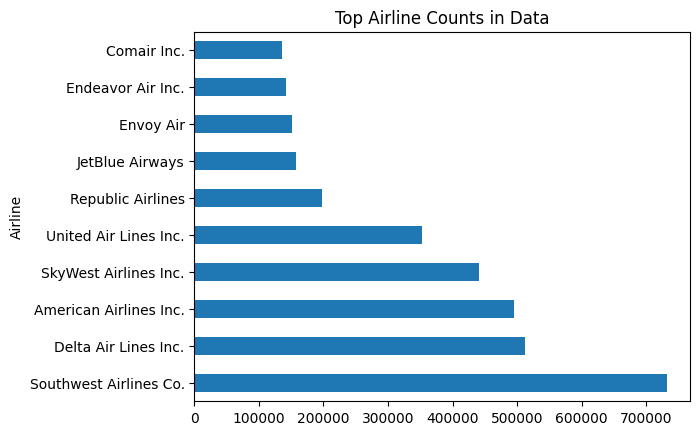

In [110]:
ax = df['Airline'].value_counts() \
    .head(10) \
    .plot(kind = 'barh', title = 'Top Airline Counts in Data')



In [111]:
df.describe()

CRSDepTime       DepTime  DepDelayMinutes      DepDelay       ArrTime  ArrDelayMinutes       AirTime  CRSElapsedTime  ActualElapsedTime      Distance       Year       Quarter         Month    DayofMonth     DayOfWeek  DOT_ID_Marketing_Airline  Flight_Number_Marketing_Airline  DOT_ID_Operating_Airline  Flight_Number_Operating_Airline  OriginAirportID  OriginAirportSeqID  OriginCityMarketID  OriginStateFips     OriginWac  DestAirportID  DestAirportSeqID  DestCityMarketID  DestStateFips       DestWac      DepDel15  DepartureDelayGroups       TaxiOut     WheelsOff      WheelsOn        TaxiIn    CRSArrTime      ArrDelay      ArrDel15  ArrivalDelayGroups  DistanceGroup  DivAirportLandings      DepTime2      DepTime3
count  4.078318e+06  3.957885e+06     3.957823e+06  3.957823e+06  3.954079e+06     3.944916e+06  3.944916e+06    4.078318e+06       3.944916e+06  4.078318e+06  4078318.0  4.078318e+06  4.078318e+06  4.078318e+06  4.078318e+06              4.078318e+06                     4.078318e+06              4.078318e+06                     4.078318e+06     4.078318e+06        4.078318e+06        4.078318e+06     4.078318e+06  4.078318e+06   4.078318e+06      4.078318e+06      4.078318e+06   4.078318e+06  4.078318e+06  3.957823e+06          3.957823e+06  3.955652e+06  3.955652e+06  3.954076e+06  3.954076e+06  4.078318e+06  3.944916e+06  3.944916e+06        3.944916e+06   4.078318e+06        4.078318e+06  3.957885e+06  3.957885e+06
mean   1.329587e+03  1.334374e+03     1.601494e+01  1.309049e+01  1.457886e+03     1.578307e+01  1.110075e+02    1.413211e+02       1.358624e+02  7.978657e+02     2022.0  1.741207e+00  4.083803e+00  1.571131e+01  4.005566e+00              1.983101e+04                     2.562115e+03              1.999122e+04                     2.562145e+03     1.265994e+04        1.265998e+06        3.175708e+04     2.746504e+01  5.399368e+01   1.265990e+04      1.265994e+06      3.175704e+04   2.746550e+01  5.399338e+01  2.184625e-01          2.141248e-01  1.697375e+01  1.356576e+03  1.455073e+03  7.894387e+00  1.486058e+03  7.528486e+00  2.164715e-01       -6.256103e-02   3.663516e+00        3.685098e-03  2.223957e+01  2.223957e+01
std    4.904801e+02  5.056219e+02     5.231498e+01  5.332016e+01  5.431841e+02     5.198424e+01  6.996246e+01    7.179635e+01       7.185501e+01  5.914742e+02        0.0  7.037563e-01  1.998918e+00  8.760122e+00  2.007050e+00              2.760907e+02                     1.745826e+03              3.767694e+02                     1.745873e+03     1.522713e+03        1.522711e+05        1.320296e+03     1.670547e+01  2.664820e+01   1.522718e+03      1.522716e+05      1.320286e+03   1.670567e+01  2.664849e+01  4.132030e-01          2.345973e+00  9.495407e+00  5.075580e+02  5.378428e+02  6.663118e+00  5.185078e+02  5.524625e+01  4.118393e-01        2.487442e+00   2.320848e+00        1.141331e-01  8.427032e+00  8.427032e+00
min    1.000000e+00  1.000000e+00     0.000000e+00 -7.800000e+01  1.000000e+00     0.000000e+00  8.000000e+00   -4.800000e+01       1.400000e+01  3.100000e+01     2022.0  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00              1.939300e+04                     1.000000e+00              1.939300e+04                     1.000000e+00     1.013500e+04        1.013506e+06        3.007000e+04     1.000000e+00  1.000000e+00   1.013500e+04      1.013506e+06      3.007000e+04   1.000000e+00  1.000000e+00  0.000000e+00         -2.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00 -1.000000e+02  0.000000e+00       -2.000000e+00   1.000000e+00        0.000000e+00  1.666667e-02  1.666667e-02
25%    9.140000e+02  9.170000e+02     0.000000e+00 -5.000000e+00  1.046000e+03     0.000000e+00  6.000000e+01    8.900000e+01       8.300000e+01  3.680000e+02     2022.0  1.000000e+00  2.000000e+00  8.000000e+00  2.000000e+00              1.979000e+04                     1.105000e+03              1.979000e+04                     1.105000e+03     1.129200e+04    

In [112]:
object_cols = [col for col in df.columns if df[col].dtype == 'object']


In [113]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()

In [114]:
categories_df = df[object_cols].astype('category')

In [115]:
airline_counts = categories_df['Airline'].value_counts().reset_index()
airline_counts.columns = ['Airline', 'Count']
airline_counts

Airline   Count
0                      Southwest Airlines Co.  731925
1                        Delta Air Lines Inc.  512114
2                      American Airlines Inc.  495953
3                       SkyWest Airlines Inc.  440807
4                       United Air Lines Inc.  352009
5                           Republic Airlines  197881
6                             JetBlue Airways  156793
7                                   Envoy Air  150758
8                           Endeavor Air Inc.  142624
9                                 Comair Inc.  135884
10                       Alaska Airlines Inc.  129510
11                           Spirit Air Lines  129208
12                     Frontier Airlines Inc.   86557
13                              Allegiant Air   73504
14                         Mesa Airlines Inc.   71972
15                                Horizon Air   56320
16                Capital Cargo International   52827
17  Commutair Aka Champlain Enterprises, Inc.   44367
18                     Hawaiian Airlines Inc.   42212
19                Air Wisconsin Airlines Corp   40300
20   GoJet Airlines, LLC d/b/a United Express   34793

$$P(A|B) = \dfrac{P(B|A) \times P(A)}{P(B)}$$

$$\text{Probability of A given B is True} = \dfrac{\text{Probability of observing B if A is true} \times \text{Probability of A before seeing evidence B}}{\text{Total probability of observing B under all possible hypotheses}}$$

$$\text{Posterior Probability} = \dfrac{\text{Likelihood} \times \text{Prior Probability}}{\text{Marginal Probability}}$$

In [117]:
import plotly.express as px
gap_minder_df = px.data.gapminder()
px.scatter(gap_minder_df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           labels={'continent': 'Continent', 'year':'Year', 'lifeExp':'Life Expectancy', 'pop':'Population', 'gdpPercap':'GDP Per Capita'},
           #facet_col='continent',
           
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [118]:
df.groupby(['Airline', 'FlightDate']).agg(Num_Unique_Origins = ('Origin', 'nunique'),
                          Num_Unique_Dest = ('Dest', 'nunique'),
                          Flight_Count = ('Flight_Number_Operating_Airline', 'nunique')).reset_index()

Airline  FlightDate  Num_Unique_Origins  Num_Unique_Dest  Flight_Count
0     Air Wisconsin Airlines Corp  2022-01-01                  52               51           211
1     Air Wisconsin Airlines Corp  2022-01-02                  50               49           214
2     Air Wisconsin Airlines Corp  2022-01-03                  51               49           204
3     Air Wisconsin Airlines Corp  2022-01-04                  47               48           187
4     Air Wisconsin Airlines Corp  2022-01-05                  47               47           192
...                           ...         ...                 ...              ...           ...
4447        United Air Lines Inc.  2022-07-27                 109              110          1625
4448        United Air Lines Inc.  2022-07-28                 110              110          1636
4449        United Air Lines Inc.  2022-07-29                 110              109          1630
4450        United Air Lines Inc.  2022-07-30                 109              108          1528
4451        United Air Lines Inc.  2022-07-31                 107              106          1587

[4452 rows x 5 columns]

In [119]:
px.bar(airline_counts, x = 'Airline', y = 'Count', text_auto='.2s')